In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from wordfreq import word_frequency

# Preprocessing (Data Preperation)

In [2]:
stadt_land_fluss_data = pd.read_csv('stadt_land_fluss.csv') # our categorized table
df = pd.read_excel('Games - Transcript.xlsx')

#clean up just in case
letter = 'Letter'
category = 'Category'
points = 'Points'
answer = 'Answer'
player_id = 'Player ID'
unique = 'Unique'
df[player_id] = df[player_id].str.strip()
df[letter] = df[letter].str.strip()
df[category] = df[category].str.strip()
df[answer] = df[answer].str.strip()

df = df.iloc[:, :-1] # last column was for us manually checking whether words were valid or not

df

,GameNo,Player ID,Letter,Category,Answer,Unique,Points
0,1,1-A,D,Stadt,Duisburg,0,1
1,1,1-A,D,Land,Deutschland,1,2
2,1,1-A,D,Fluß,NaN,0,0
3,1,1-A,D,Tier,Delphin,1,2
4,1,1-A,D,Pflanzen,Disteln,1,2
...,...,...,...,...,...,...,...
1146,3,3-B,N,Land,Niger,0,1
1147,3,3-B,N,Fluß,Niger,0,1
1148,3,3-B,N,Tier,Nagetier,1,2
1149,3,3-B,N,Pflanzen,Nadelbäume,1,2


In [3]:
#naming mismatch between tables
category_mapping = {
    "Pflanzen": "Pflanze",
     "Fluß": "Fluss"
}
df[category] = df[category].replace(category_mapping)

# Filter (Remove) answers that does not match our stadt_land_fluss_data by removing row
# df_filtered = df[df.apply(lambda row: ((row["Category"], row["Answer"]) 
#                                        in zip(stadt_land_fluss_data["Category"], 
#                                               stadt_land_fluss_data["Word"])), axis=1)]

# df_filtered

# Filter (Remove) answers that does not match our stadt_land_fluss_data by modifying rows. 
def modify_row(row):
    if (row[category], row[answer]) not in zip(stadt_land_fluss_data[category], 
                                                   stadt_land_fluss_data["Word"]):
        row[answer] = "0"
        row[unique] = 0
        row[points] = 0
    return row

df = df.apply(modify_row, axis=1)
df

,GameNo,Player ID,Letter,Category,Answer,Unique,Points
0,1,1-A,D,Stadt,Duisburg,0,1
1,1,1-A,D,Land,Deutschland,1,2
2,1,1-A,D,Fluss,0,0,0
3,1,1-A,D,Tier,Delphin,1,2
4,1,1-A,D,Pflanze,0,0,0
...,...,...,...,...,...,...,...
1146,3,3-B,N,Land,Niger,0,1
1147,3,3-B,N,Fluss,0,0,0
1148,3,3-B,N,Tier,Nagetier,1,2
1149,3,3-B,N,Pflanze,0,0,0


# Visualization Methods

In [4]:
def get_column_names(two_column_data):
    column0 = two_column_data.columns[0]
    column1 = two_column_data.columns[1]
    return column0, column1

In [5]:
def create_charts(two_column_data, bar_chart=False, pie_chart=False, title_bar='', title_pie=''):
    if bar_chart:
        create_bar_chart(two_column_data, title_bar)
    if pie_chart:
        create_pie_chart(two_column_data, title_pie)

In [6]:
def create_bar_chart(two_column_data, title_bar):
    column0, column1 = get_column_names(two_column_data)
    plt.figure(figsize=(10, 6))
    plt.bar(two_column_data[column0], two_column_data[column1])
    plt.xlabel(column0)
    plt.ylabel(column1)
    plt.title(title_bar)
    plt.show()

In [7]:
def create_pie_chart(two_column_data, title_pie):
    column0, column1 = get_column_names(two_column_data)
    plt.figure(figsize=(8, 8))
    plt.pie(
        two_column_data[column1], 
        labels=two_column_data[column0], 
        autopct='%1.1f%%', 
        startangle=90
    )
    plt.title(title_pie)
    plt.show()

In [8]:
def group(data, column0, column1, operation, new_column):
    group_columns = column0 if isinstance(column0, list) else [column0]
    new_table = data.groupby(group_columns)[column1].apply(operation)
    new_table = new_table.reset_index(name=new_column)
    return new_table

In [9]:
def sort(data, column, ascend=False):
    sorted_data = data.sort_values(by=column, ascending=ascend)
    sorted_data = sorted_data.reset_index(drop=True)
    return sorted_data

In [10]:
def abstract_min_max_finder(data, column, function):
    min_or_max_val = function(data[column])
    min_or_max_list = data[data[column] == min_or_max_val]
    return min_or_max_list

In [11]:
def min_max_finder(data, column):
    min_col = abstract_min_max_finder(data, column, min)
    max_col = abstract_min_max_finder(data, column, max)
    return min_col, max_col

# Information about how many rounds were played

## Tabular Data

In [12]:
max_pos = 'Max Number of Possible Answers'
letter_row_count = group(df, letter, letter, len, max_pos)
letter_row_count

,Letter,Max Number of Possible Answers
0,A,66
1,B,42
2,C,36
3,D,108
4,E,35
5,F,90
6,G,66
7,H,96
8,I,60
9,J,66


In [13]:
sorted_letter_row_count = sort(letter_row_count, max_pos, ascend=False)
sorted_letter_row_count

,Letter,Max Number of Possible Answers
0,D,108
1,K,96
2,H,96
3,F,90
4,R,78
5,P,72
6,J,66
7,A,66
8,G,66
9,I,60


In [14]:
category_row_count = group(df, category, category, len, max_pos)
print("in case some groups skip a category or add a new category (even for 1 round) it should be considered\n")
category_row_count

in case some groups skip a category or add a new category (even for 1 round) it should be considered



,Category,Max Number of Possible Answers
0,Beruf,192
1,Fluss,192
2,Land,192
3,Pflanze,192
4,Stadt,191
5,Tier,192


# Visualizations for uniqueness of letters

In [15]:
mean = 'Mean'
mean_unique = 'Unique Rate'
total = 'Total'
total_unique = 'Total Unique Answers'

In [16]:
letter_and_total_unique = group(df, letter, unique, np.sum, total_unique)
letter_and_total_unique

,Letter,Total Unique Answers
0,A,26
1,B,25
2,C,13
3,D,40
4,E,17
5,F,31
6,G,20
7,H,40
8,I,14
9,J,17


In [17]:
uniqueness = pd.merge(letter_row_count, letter_and_total_unique, on=letter, how='left')
uniqueness[mean_unique] = uniqueness[total_unique] / uniqueness[max_pos]
print("Since number of games with each letter is different mean is a better method for analysis.\n")
uniqueness

Since number of games with each letter is different mean is a better method for analysis.



,Letter,Max Number of Possible Answers,Total Unique Answers,Unique Rate
0,A,66,26,0.393939
1,B,42,25,0.595238
2,C,36,13,0.361111
3,D,108,40,0.370370
4,E,35,17,0.485714
5,F,90,31,0.344444
6,G,66,20,0.303030
7,H,96,40,0.416667
8,I,60,14,0.233333
9,J,66,17,0.257576


In [18]:
print("Data ordered from most unique to least unique based on " + mean_unique + ":\n")
sorted_uniqueness = sort(uniqueness, mean_unique, ascend=False)
sorted_uniqueness

Data ordered from most unique to least unique based on Unique Rate:



,Letter,Max Number of Possible Answers,Total Unique Answers,Unique Rate
0,M,36,26,0.722222
1,B,42,25,0.595238
2,S,54,32,0.592593
3,L,24,13,0.541667
4,K,96,50,0.520833
5,W,42,21,0.500000
6,E,35,17,0.485714
7,P,72,31,0.430556
8,H,96,40,0.416667
9,N,12,5,0.416667


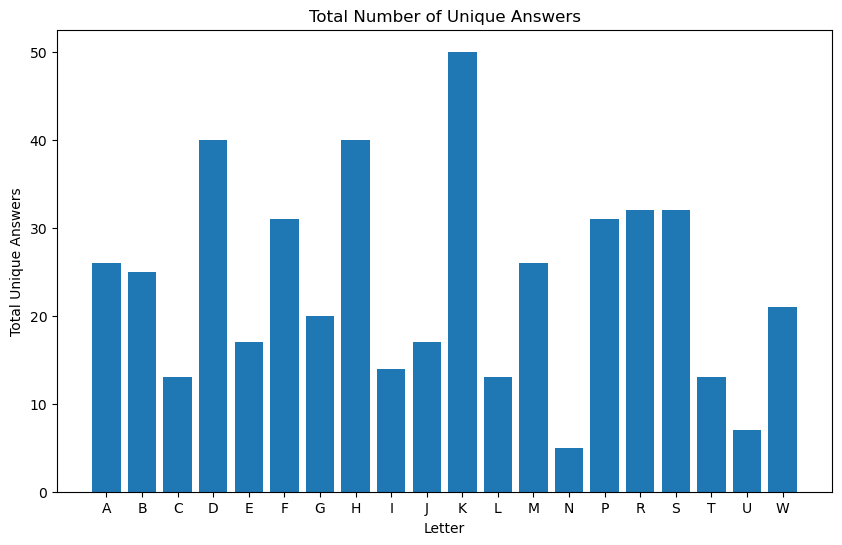

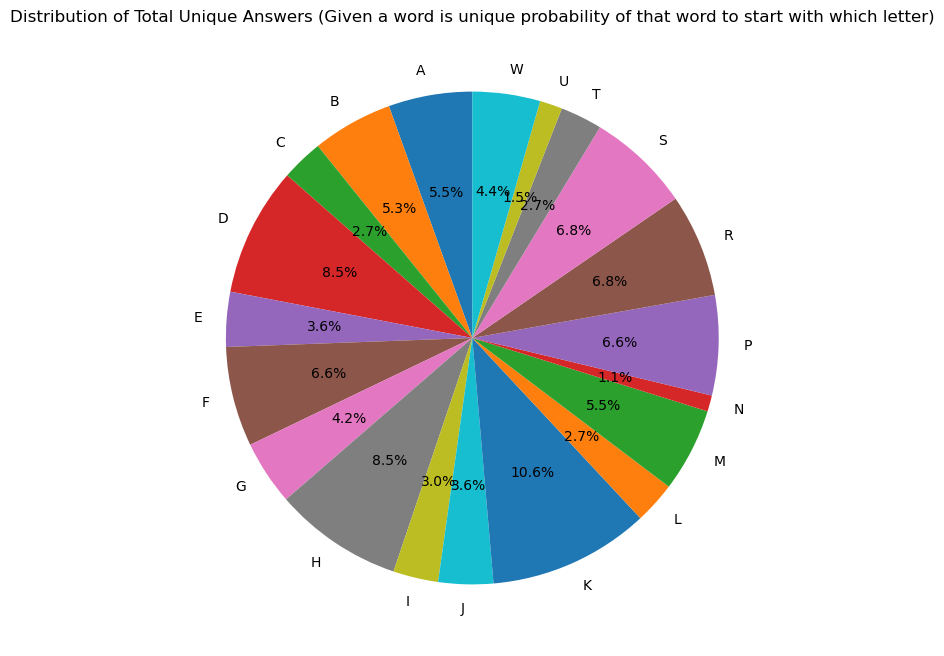

More often a letter was used more likely to have more unique words on these charts.


In [19]:
bar_chart = True
pie_chart = True
title_bar = 'Total Number of Unique Answers'
title_pie = 'Distribution of Total Unique Answers (Given a word is unique probability of that word to start with which letter)'
create_charts(letter_and_total_unique, bar_chart, pie_chart, title_bar, title_pie)
print("More often a letter was used more likely to have more unique words on these charts.")

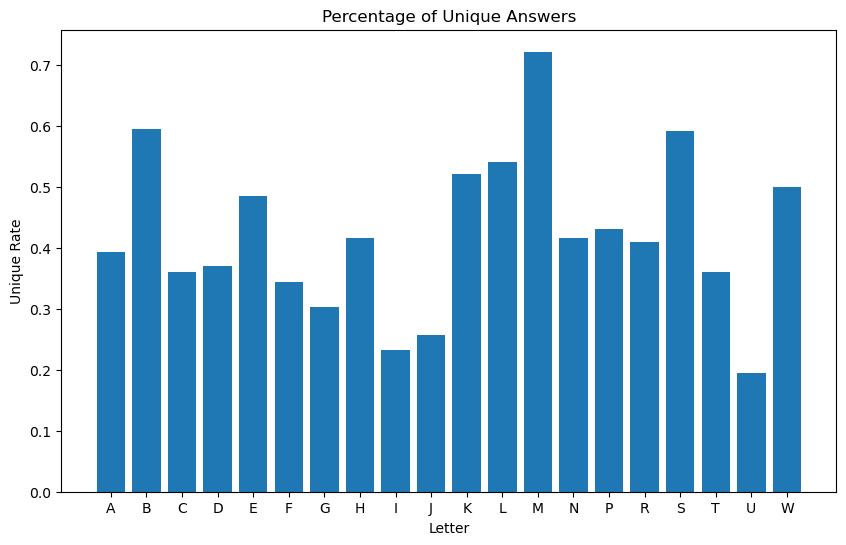

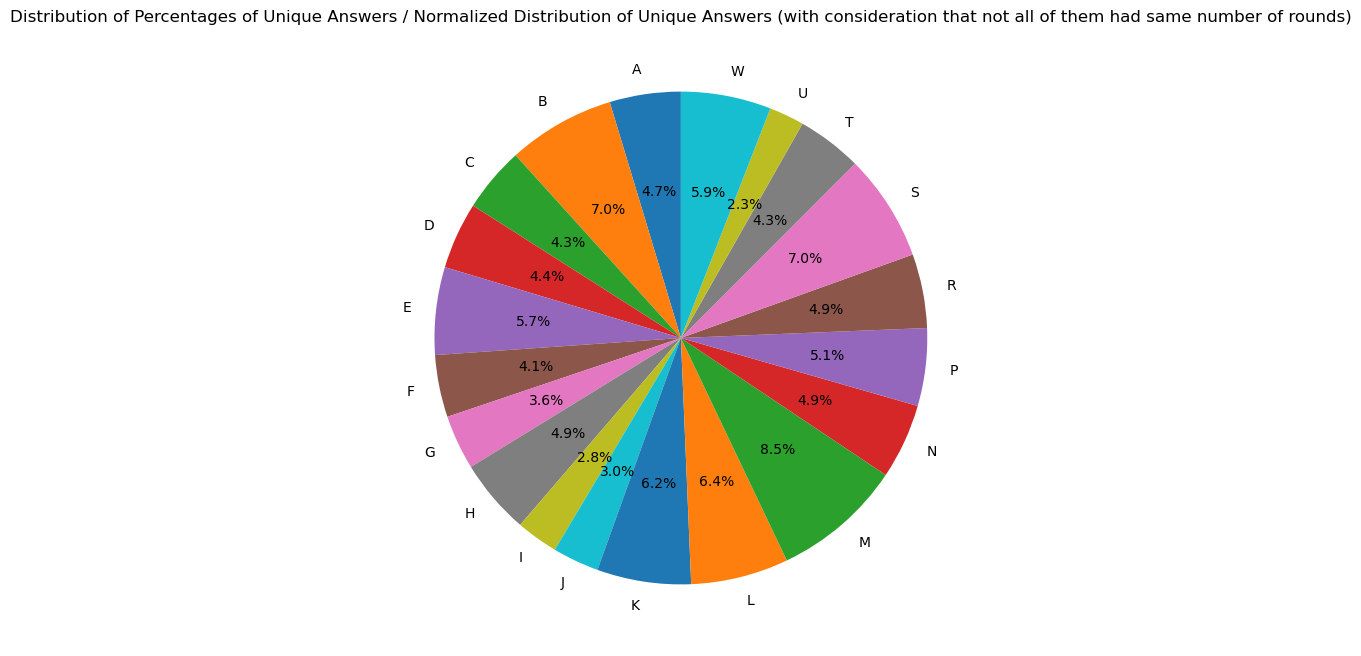

How often a letter was used doesn't have direct impact on this test; however, with more rounds played with same letter less creative players can be.


In [20]:
letter_mean_unique = uniqueness[[letter, mean_unique]]
bar_chart = True
pie_chart = True
title_bar = 'Percentage of Unique Answers'
title_pie = 'Distribution of Percentages of Unique Answers / Normalized Distribution of Unique Answers (with consideration that not all of them had same number of rounds)'
create_charts(letter_mean_unique, bar_chart, pie_chart, title_bar, title_pie)
print("How often a letter was used doesn't have direct impact on this test; however, with more rounds played with same letter less creative players can be.")

# Visualizations for answer_rate for letters

In [21]:
points_df = df[df['Points'] > 0]
answer_rate = 'Answer Rate'
answers_total = 'Total Valid Answer'
letter_and_success = group(points_df, letter, 'Points', len, answers_total)
answered = pd.merge(letter_row_count, letter_and_success, on=letter, how='left')
answered[answer_rate] = answered[answers_total] / answered[max_pos]
answered

,Letter,Max Number of Possible Answers,Total Valid Answer,Answer Rate
0,A,66,48,0.727273
1,B,42,25,0.595238
2,C,36,20,0.555556
3,D,108,82,0.759259
4,E,35,26,0.742857
5,F,90,68,0.755556
6,G,66,50,0.757576
7,H,96,70,0.729167
8,I,60,45,0.750000
9,J,66,48,0.727273


In [22]:
sorted_answered = sort(answered, answer_rate, ascend=False)
sorted_answered

,Letter,Max Number of Possible Answers,Total Valid Answer,Answer Rate
0,M,36,29,0.805556
1,L,24,19,0.791667
2,K,96,73,0.760417
3,D,108,82,0.759259
4,G,66,50,0.757576
5,F,90,68,0.755556
6,I,60,45,0.750000
7,E,35,26,0.742857
8,S,54,40,0.740741
9,H,96,70,0.729167


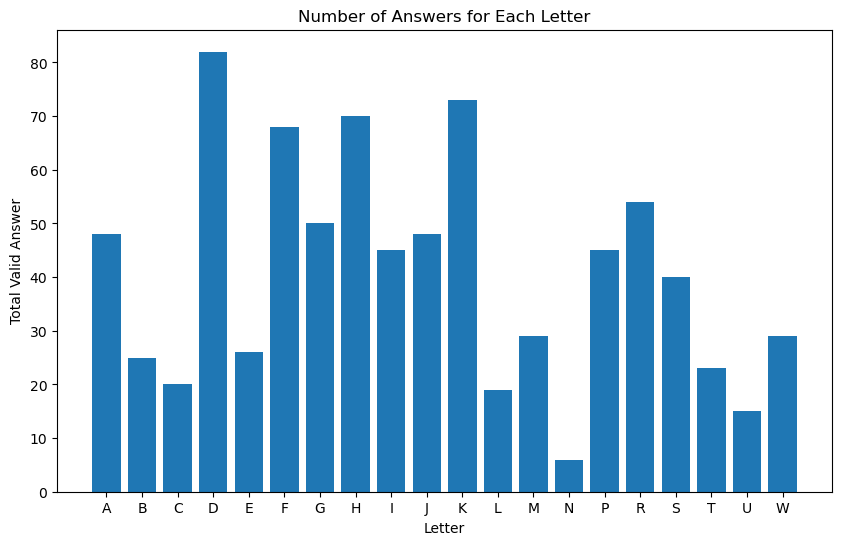

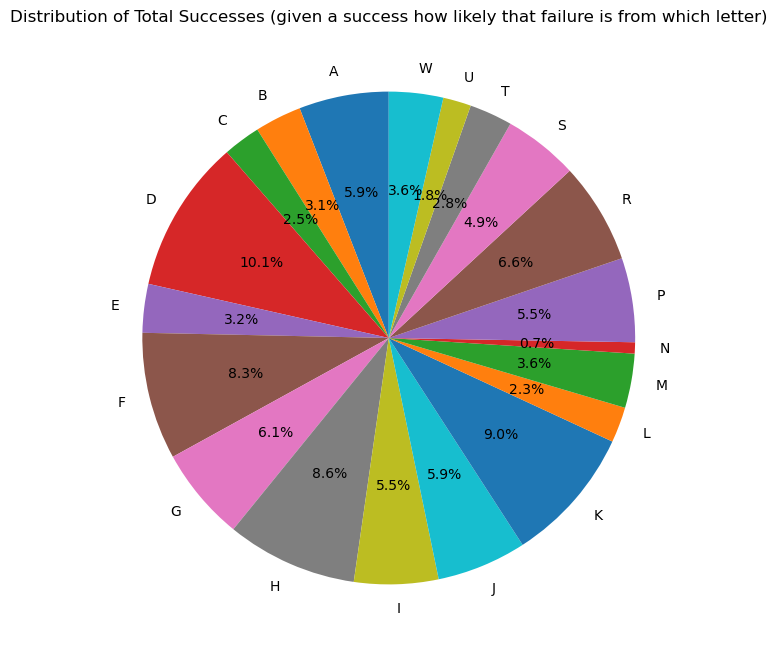

In [23]:
bar_chart = True
pie_chart = True
title_bar = 'Number of Answers for Each Letter'
title_pie = 'Distribution of Total Successes (given a success how likely that failure is from which letter)'
create_charts(letter_and_success, bar_chart, pie_chart, title_bar, title_pie)

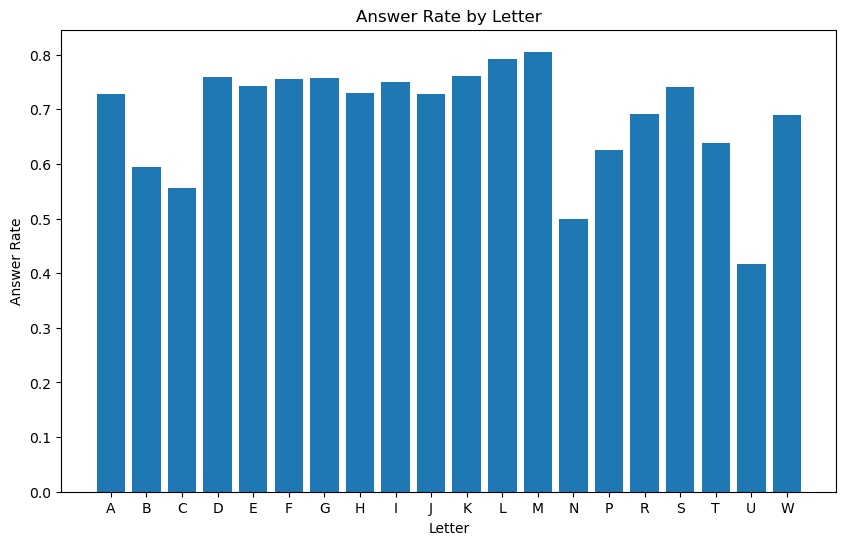

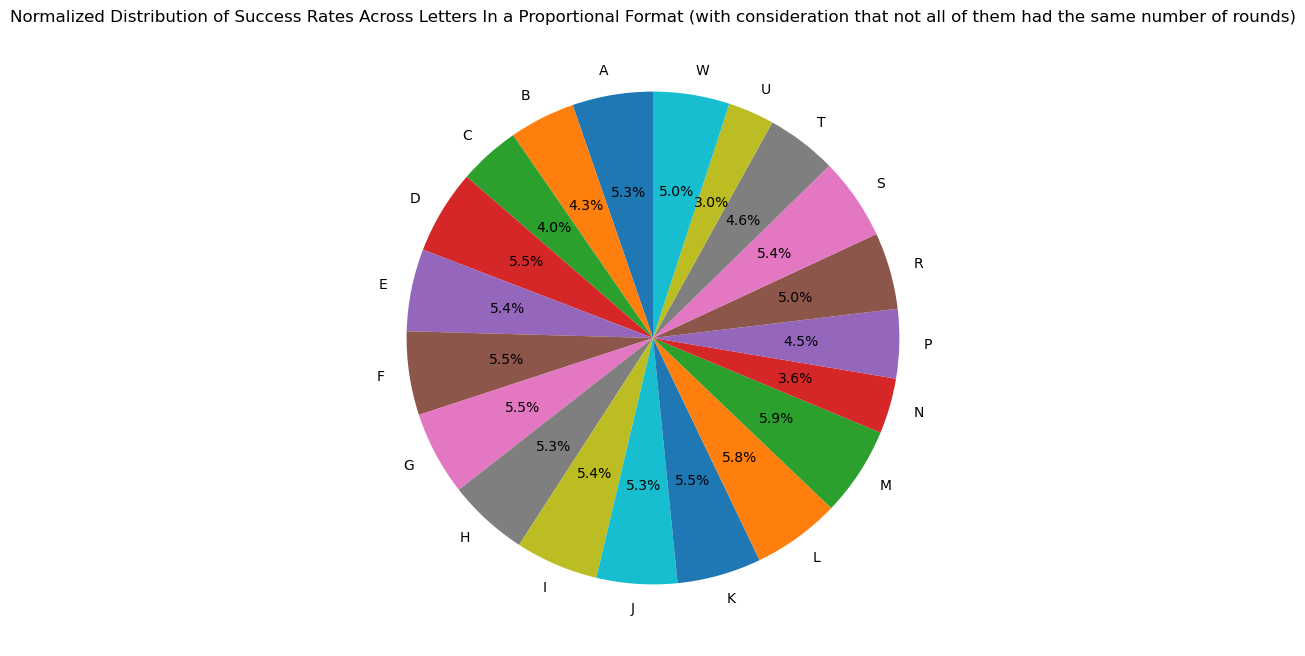

In [24]:
letter_and_sucess_normalized = answered[[letter, answer_rate]]
bar_chart = True
pie_chart = True
title_bar = 'Answer Rate by Letter'
title_pie = 'Normalized Distribution of Success Rates Across Letters In a Proportional Format (with consideration that not all of them had the same number of rounds)'
create_charts(letter_and_sucess_normalized, bar_chart, pie_chart, title_bar, title_pie)

# Visualizations for points of letters

In [25]:
points_rate = 'Points Rate'
total_points = 'Total Points'

In [26]:
letter_and_total_points = group(df, letter, points, np.sum, total_points)
letter_and_total_points

,Letter,Total Points
0,A,74
1,B,50
2,C,33
3,D,122
4,E,43
5,F,99
6,G,70
7,H,110
8,I,59
9,J,65


In [27]:
pointss = pd.merge(letter_row_count, letter_and_total_points, on=letter, how='left')
pointss[points_rate] = pointss[total_points] / pointss[max_pos]
print("Since number of games with each letter is different mean is a better method for analysis.\n")
pointss

Since number of games with each letter is different mean is a better method for analysis.



,Letter,Max Number of Possible Answers,Total Points,Points Rate
0,A,66,74,1.121212
1,B,42,50,1.190476
2,C,36,33,0.916667
3,D,108,122,1.129630
4,E,35,43,1.228571
5,F,90,99,1.100000
6,G,66,70,1.060606
7,H,96,110,1.145833
8,I,60,59,0.983333
9,J,66,65,0.984848


In [28]:
print("Data ordered from most to least points based on " + points_rate + ":\n")
sorted_pointss = sort(pointss, points_rate, ascend=False)
sorted_pointss

Data ordered from most to least points based on Points Rate:



,Letter,Max Number of Possible Answers,Total Points,Points Rate
0,M,36,55,1.527778
1,S,54,72,1.333333
2,L,24,32,1.333333
3,K,96,123,1.281250
4,E,35,43,1.228571
5,B,42,50,1.190476
6,W,42,50,1.190476
7,H,96,110,1.145833
8,D,108,122,1.129630
9,A,66,74,1.121212


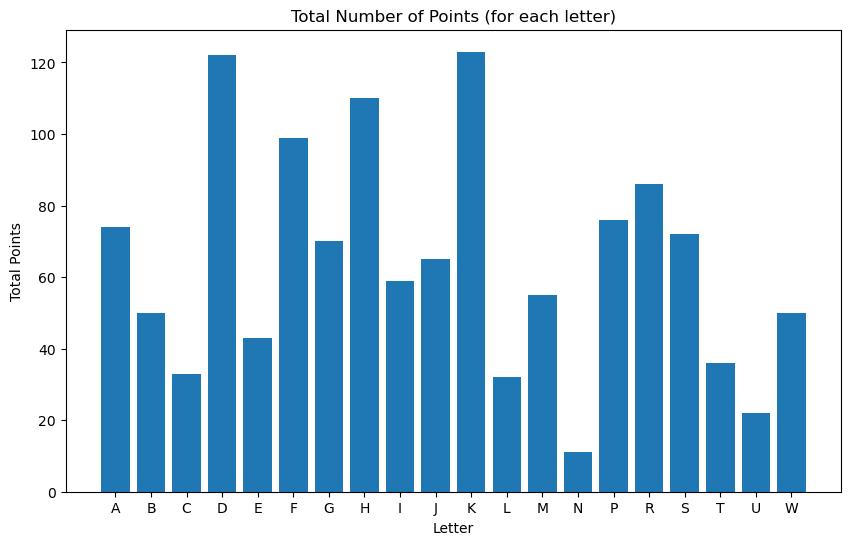

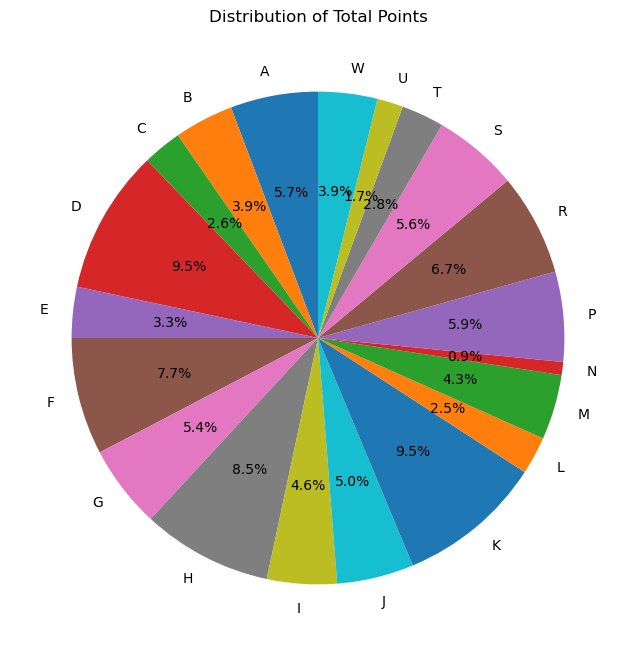

In [29]:
bar_chart = True
pie_chart = True
title_bar = 'Total Number of Points (for each letter)'
title_pie = 'Distribution of Total Points'
create_charts(letter_and_total_points, bar_chart, pie_chart, title_bar, title_pie)

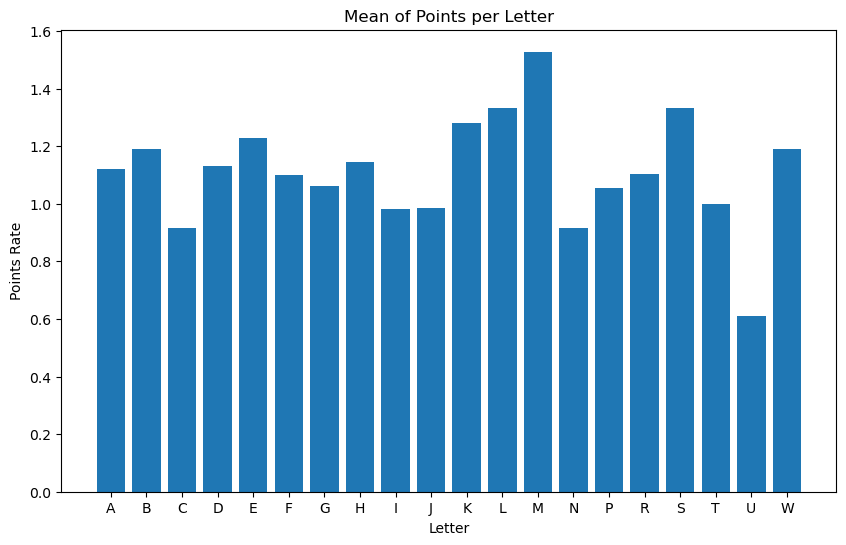

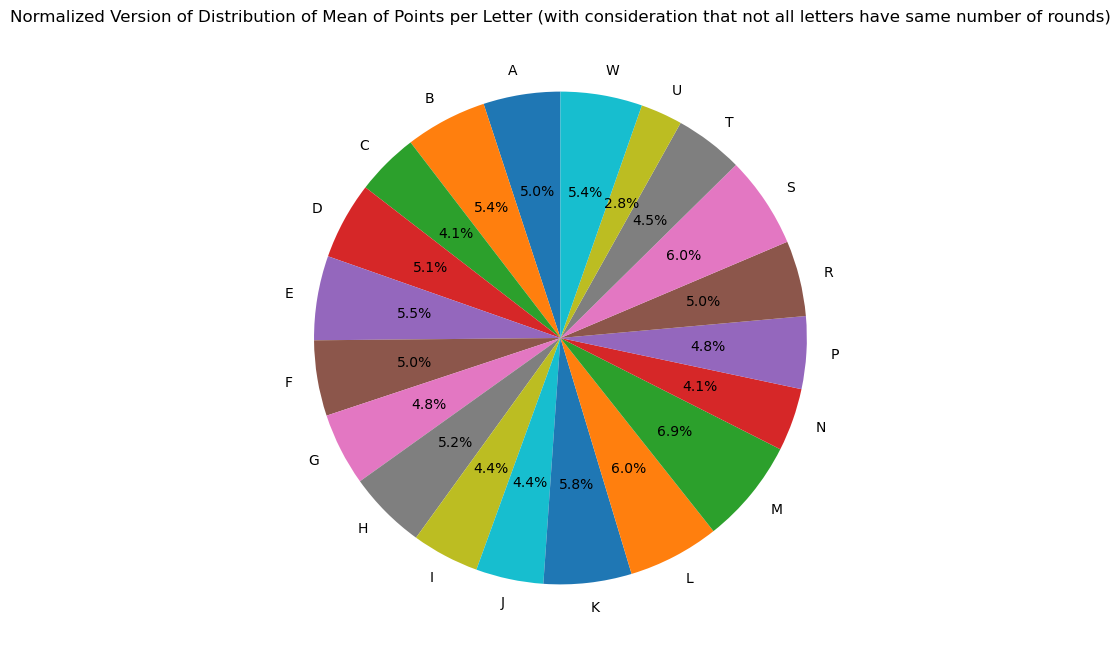

In [30]:
letter_points_rate = pointss[[letter, points_rate]]
bar_chart = True
pie_chart = True
title_bar = 'Mean of Points per Letter'
title_pie = 'Normalized Version of Distribution of Mean of Points per Letter (with consideration that not all letters have same number of rounds)'
create_charts(letter_points_rate, bar_chart, pie_chart, title_bar, title_pie)

# Visualizations for uniqueness of categories

In [31]:
category_and_total_unique = group(df, category, unique, np.sum, total_unique)

cat_uniqueness = pd.merge(category_row_count, category_and_total_unique, on=category, how='left')

cat_uniqueness[mean_unique] = cat_uniqueness[total_unique] / cat_uniqueness[max_pos]

print("Since number of games with each letter is different mean is a better method for analysis.\n")

cat_uniqueness

Since number of games with each letter is different mean is a better method for analysis.



,Category,Max Number of Possible Answers,Total Unique Answers,Unique Rate
0,Beruf,192,104,0.541667
1,Fluss,192,39,0.203125
2,Land,192,71,0.369792
3,Pflanze,192,90,0.468750
4,Stadt,191,83,0.434555
5,Tier,192,86,0.447917


In [32]:
print("Data ordered from most unique to least unique based on \'" + mean_unique + "\':\n")
sorted_cat_uniqueness = sort(cat_uniqueness, mean_unique, ascend=False)
sorted_cat_uniqueness

Data ordered from most unique to least unique based on 'Unique Rate':



,Category,Max Number of Possible Answers,Total Unique Answers,Unique Rate
0,Beruf,192,104,0.541667
1,Pflanze,192,90,0.468750
2,Tier,192,86,0.447917
3,Stadt,191,83,0.434555
4,Land,192,71,0.369792
5,Fluss,192,39,0.203125


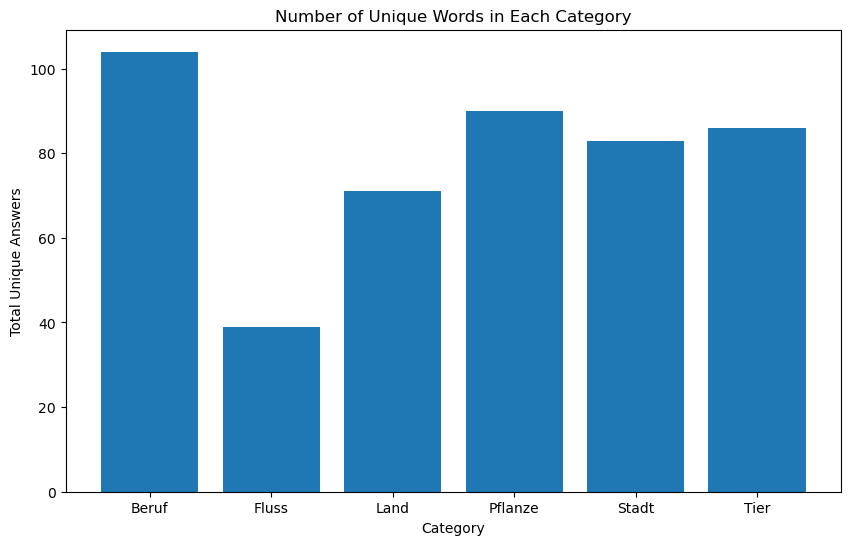

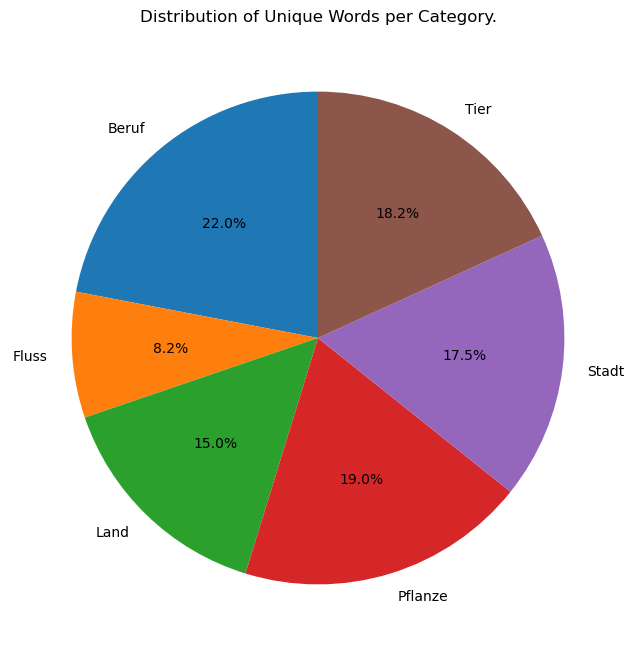

In [33]:
result = cat_uniqueness[[category, total_unique]]
bar_chart = True
pie_chart = True
title_bar = 'Number of Unique Words in Each Category'
title_pie = 'Distribution of Unique Words per Category.'
create_charts(result, bar_chart, pie_chart, title_bar, title_pie)

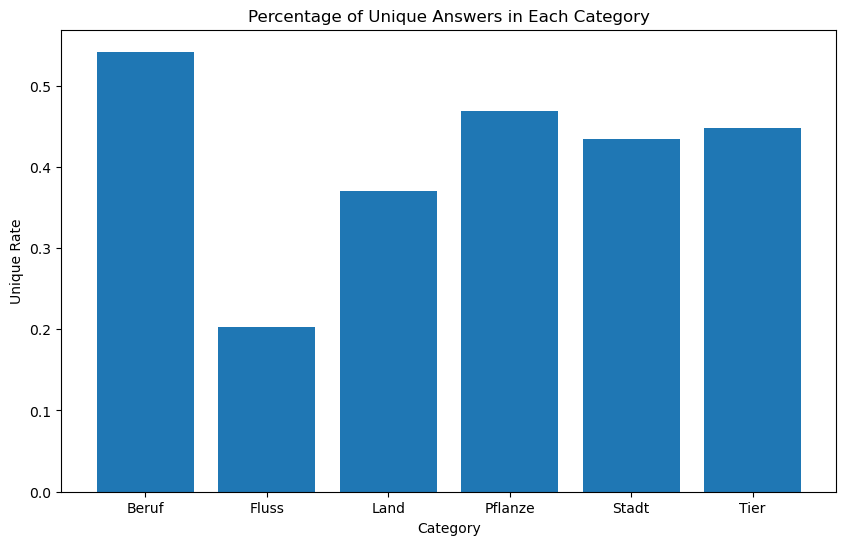

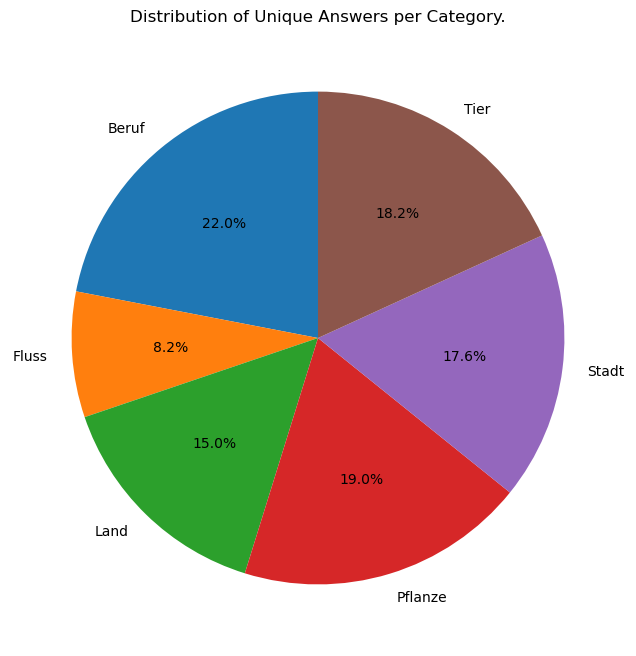

In [34]:
cat_mean_uniqueness = cat_uniqueness[[category, mean_unique]]
bar_chart = True
pie_chart = True
title_bar = 'Percentage of Unique Answers in Each Category'
title_pie = 'Distribution of Unique Answers per Category.'
create_charts(cat_mean_uniqueness, bar_chart, pie_chart, title_bar, title_pie)

# Visualizations for answer_rate for categories

In [35]:
points_df = df[df['Points'] > 0]
category_and_success = group(points_df, category, 'Points', len, answers_total)

answered_category = pd.merge(category_row_count, category_and_success, on=category, how='left')
answered_category[answer_rate] = answered_category[answers_total] / answered_category[max_pos]
answered_category

,Category,Max Number of Possible Answers,Total Valid Answer,Answer Rate
0,Beruf,192,143,0.744792
1,Fluss,192,82,0.427083
2,Land,192,155,0.807292
3,Pflanze,192,132,0.687500
4,Stadt,191,151,0.790576
5,Tier,192,152,0.791667


In [36]:
sorted_answered = sort(answered_category, answer_rate, ascend=False)
sorted_answered

,Category,Max Number of Possible Answers,Total Valid Answer,Answer Rate
0,Land,192,155,0.807292
1,Tier,192,152,0.791667
2,Stadt,191,151,0.790576
3,Beruf,192,143,0.744792
4,Pflanze,192,132,0.687500
5,Fluss,192,82,0.427083


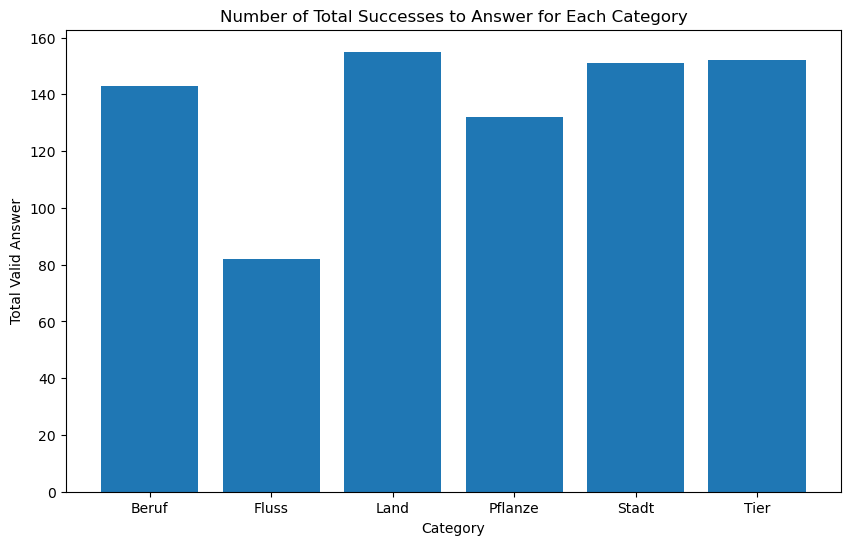

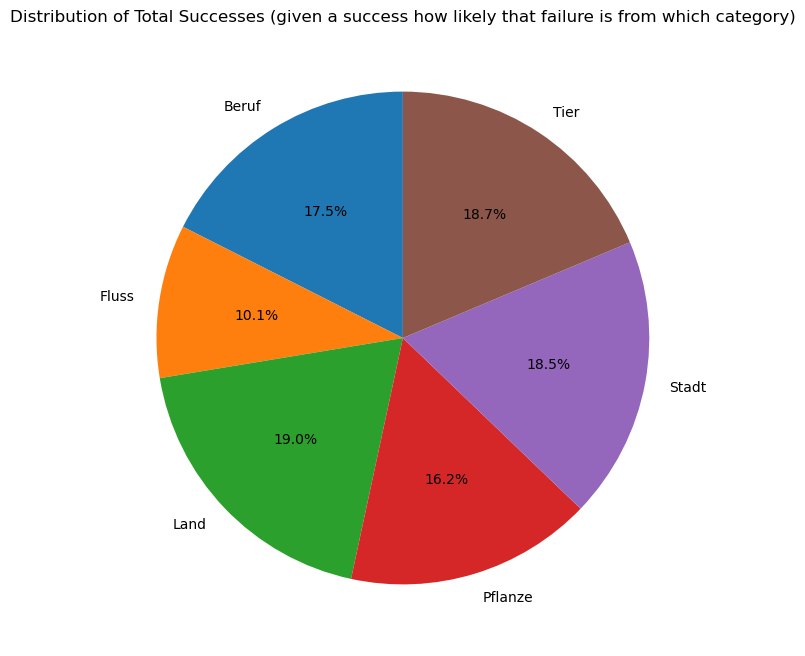

In [37]:
bar_chart = True
pie_chart = True
title_bar = 'Number of Total Successes to Answer for Each Category'
title_pie = 'Distribution of Total Successes (given a success how likely that failure is from which category)'
answers_per_category = answered_category[[category, answers_total]]
create_charts(answers_per_category, bar_chart, pie_chart, title_bar, title_pie)

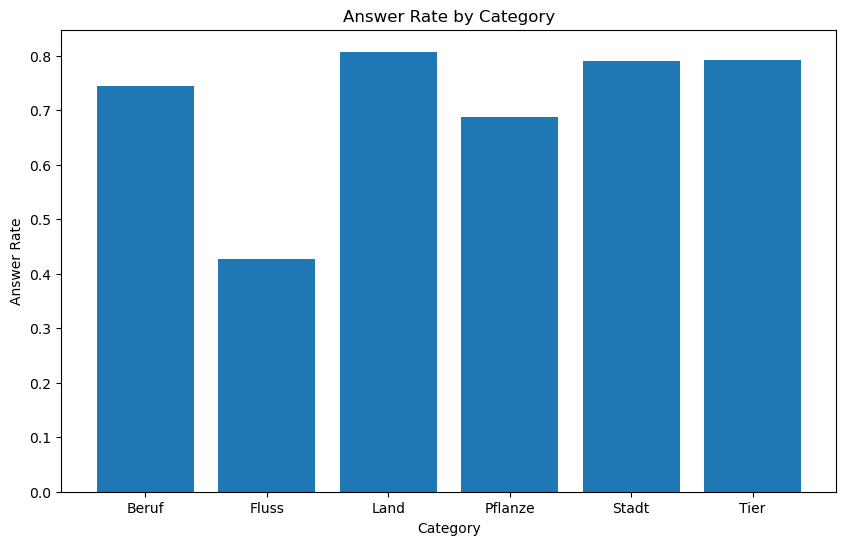

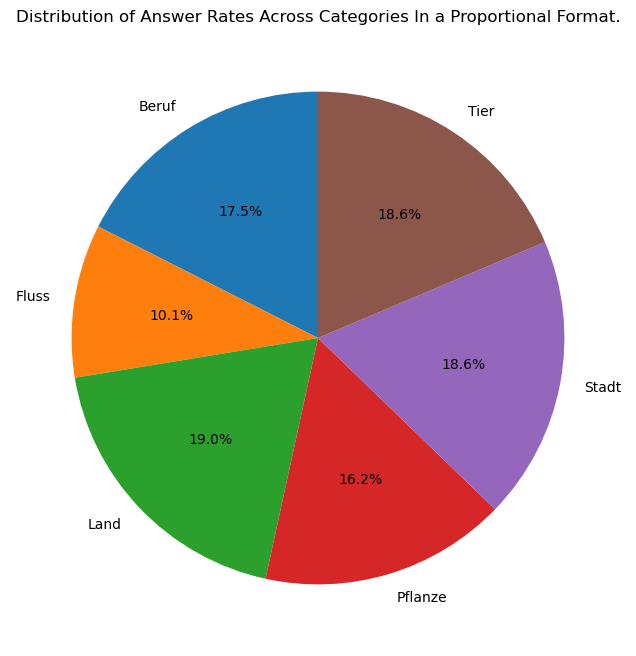

In [38]:
category_and_sucess_normalized = answered_category[[category, answer_rate]]
bar_chart = True
pie_chart = True
title_bar = 'Answer Rate by Category'
title_pie = 'Distribution of Answer Rates Across Categories In a Proportional Format.'
create_charts(category_and_sucess_normalized, bar_chart, pie_chart, title_bar, title_pie)

# Visualizations for points of categories

In [39]:
category_and_total_points = group(df, category, points, np.sum, total_points)
cat_pointss = pd.merge(category_row_count, category_and_total_points, on=category, how='left')
cat_pointss[points_rate] = cat_pointss[total_points] / cat_pointss[max_pos]
print("Since number of games with each letter is different mean is a better method for analysis.\n")
cat_pointss

Since number of games with each letter is different mean is a better method for analysis.



,Category,Max Number of Possible Answers,Total Points,Points Rate
0,Beruf,192,247,1.286458
1,Fluss,192,121,0.630208
2,Land,192,226,1.177083
3,Pflanze,192,222,1.156250
4,Stadt,191,234,1.225131
5,Tier,192,238,1.239583


In [40]:
print("Data ordered from most points to least unique based on \'" + points_rate + "\':\n")
sorted_cat_pointss = sort(cat_pointss, points_rate, ascend=False)
sorted_cat_pointss

Data ordered from most points to least unique based on 'Points Rate':



,Category,Max Number of Possible Answers,Total Points,Points Rate
0,Beruf,192,247,1.286458
1,Tier,192,238,1.239583
2,Stadt,191,234,1.225131
3,Land,192,226,1.177083
4,Pflanze,192,222,1.156250
5,Fluss,192,121,0.630208


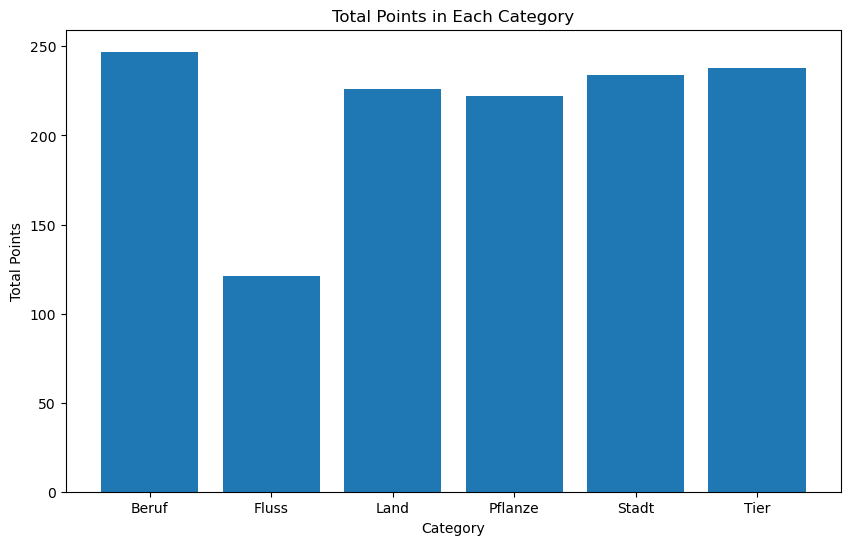

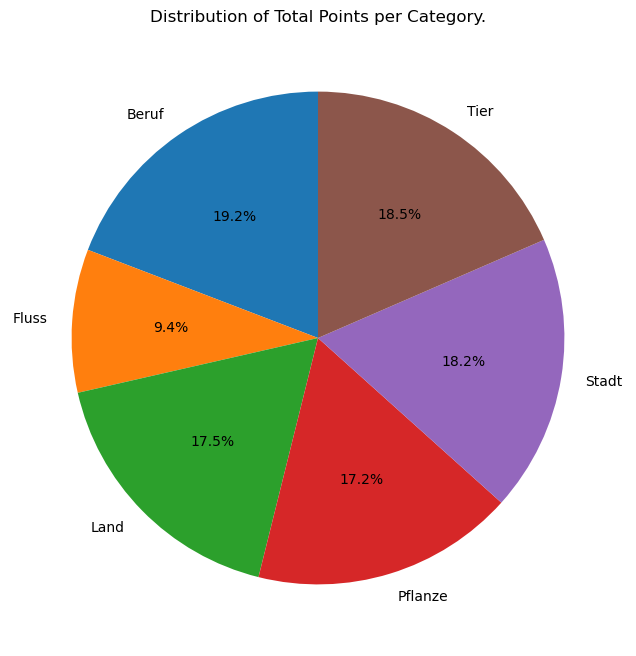

In [41]:
result = cat_pointss[[category, total_points]]
bar_chart = True
pie_chart = True
title_bar = 'Total Points in Each Category'
title_pie = 'Distribution of Total Points per Category.'
create_charts(result, bar_chart, pie_chart, title_bar, title_pie)

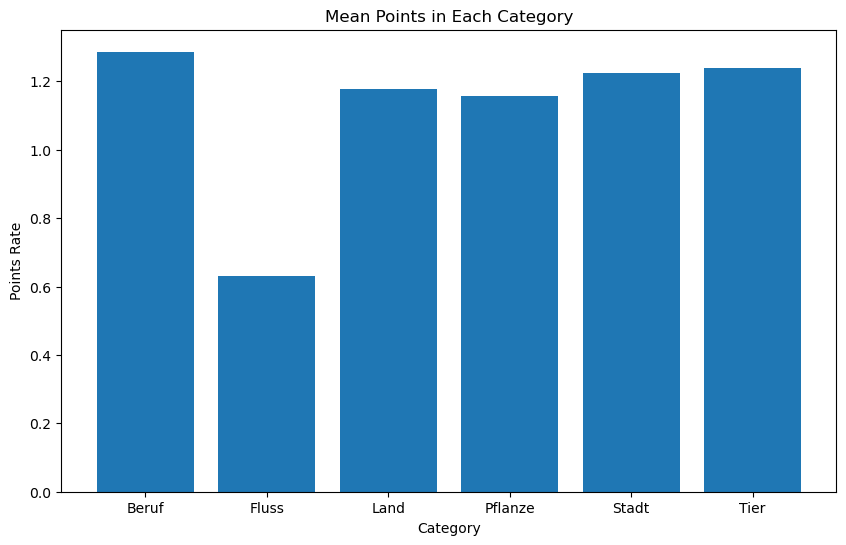

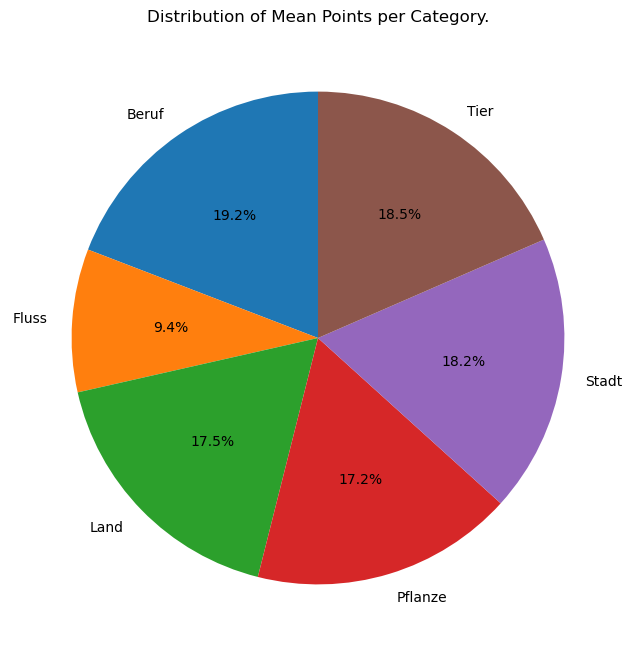

In [42]:
cat_points_rates = cat_pointss[[category, points_rate]]
bar_chart = True
pie_chart = True
title_bar = 'Mean Points in Each Category'
title_pie = 'Distribution of Mean Points per Category.'
create_charts(cat_points_rates, bar_chart, pie_chart, title_bar, title_pie)

# Visualizations for answer rate of letters and category combined grouping

In [43]:
letter_category= group(df, [letter, category], unique, np.sum, total_unique)
letter_category_naming = letter + ": " + category
letter_category[letter_category_naming] = letter_category[letter] + ': ' + letter_category[category]
letter_category = letter_category[[letter_category_naming]]
letter_category

,Letter: Category
0,A: Beruf
1,A: Fluss
2,A: Land
3,A: Pflanze
4,A: Stadt
...,...
115,W: Fluss
116,W: Land
117,W: Pflanze
118,W: Stadt


In [44]:
letter_category_answer_detailed = letter_category.copy()
letter_category_answer_detailed[answers_total] = group(
    df, [letter, category], answer, 
    lambda x: (~x.isin(["", "0", "?"]) & x.notnull()).sum(),  # Exclude invalid values and nulls
    answers_total
)[answers_total]

letter_category_answer_detailed[max_pos] = group(df, [letter, category], answer, len, max_pos)[max_pos]

letter_category_answer_detailed = letter_category_answer_detailed[[letter_category_naming, answers_total, max_pos]]
letter_category_answer_detailed[answer_rate] = letter_category_answer_detailed[answers_total] / letter_category_answer_detailed[max_pos]
letter_category_answer_detailed

,Letter: Category,Total Valid Answer,Max Number of Possible Answers,Answer Rate
0,A: Beruf,6,11,0.545455
1,A: Fluss,7,11,0.636364
2,A: Land,9,11,0.818182
3,A: Pflanze,9,11,0.818182
4,A: Stadt,9,11,0.818182
...,...,...,...,...
115,W: Fluss,6,7,0.857143
116,W: Land,2,7,0.285714
117,W: Pflanze,5,7,0.714286
118,W: Stadt,6,7,0.857143


In [45]:
sorted_letter_category_answer_detailed = sort(letter_category_answer_detailed, answer_rate, ascend=False)
sorted_letter_category_answer_detailed

,Letter: Category,Total Valid Answer,Max Number of Possible Answers,Answer Rate
0,W: Tier,7,7,1.000000
1,M: Land,6,6,1.000000
2,I: Tier,10,10,1.000000
3,J: Beruf,11,11,1.000000
4,C: Stadt,6,6,1.000000
...,...,...,...,...
115,B: Fluss,1,7,0.142857
116,N: Beruf,0,2,0.000000
117,N: Fluss,0,2,0.000000
118,U: Fluss,0,6,0.000000


In [46]:
least_answer, most_answer = min_max_finder(sorted_letter_category_answer_detailed, answer_rate)
least_answer

,Letter: Category,Total Valid Answer,Max Number of Possible Answers,Answer Rate
116,N: Beruf,0,2,0.0
117,N: Fluss,0,2,0.0
118,U: Fluss,0,6,0.0
119,C: Fluss,0,6,0.0


In [47]:
most_answer

,Letter: Category,Total Valid Answer,Max Number of Possible Answers,Answer Rate
0,W: Tier,7,7,1.0
1,M: Land,6,6,1.0
2,I: Tier,10,10,1.0
3,J: Beruf,11,11,1.0
4,C: Stadt,6,6,1.0
5,G: Beruf,11,11,1.0
6,L: Beruf,4,4,1.0
7,L: Land,4,4,1.0
8,L: Stadt,4,4,1.0
9,G: Tier,11,11,1.0


# Visualizations for uniqueness of letters and category combined grouping

In [48]:
letter_category_unique = group(df, [letter, category], unique, np.sum, total_unique)
letter_category_unique[letter_category_naming] = letter_category_unique[letter] + ': ' + letter_category_unique[category]
letter_category_unique = letter_category_unique[[letter_category_naming, total_unique]]
letter_category_unique

,Letter: Category,Total Unique Answers
0,A: Beruf,6
1,A: Fluss,3
2,A: Land,3
3,A: Pflanze,5
4,A: Stadt,7
...,...,...
115,W: Fluss,3
116,W: Land,0
117,W: Pflanze,5
118,W: Stadt,6


In [49]:
sorted_letter_category_unique = sort(letter_category_unique, total_unique, ascend=False)
sorted_letter_category_unique

,Letter: Category,Total Unique Answers
0,K: Beruf,12
1,D: Tier,12
2,K: Land,12
3,D: Stadt,10
4,H: Beruf,10
...,...,...
115,U: Fluss,0
116,N: Beruf,0
117,N: Fluss,0
118,N: Land,0


In [50]:
least_unique, most_unique = min_max_finder(sorted_letter_category_unique, total_unique)
least_unique

,Letter: Category,Total Unique Answers
110,C: Fluss,0
111,J: Tier,0
112,W: Land,0
113,G: Fluss,0
114,U: Tier,0
115,U: Fluss,0
116,N: Beruf,0
117,N: Fluss,0
118,N: Land,0
119,I: Tier,0


In [51]:
most_unique

,Letter: Category,Total Unique Answers
0,K: Beruf,12
1,D: Tier,12
2,K: Land,12


In [52]:
letter_category_unique_detailed = letter_category_unique.copy()
letter_category_unique_detailed[answers_total] = group(
    df, [letter, category], answer, 
    lambda x: (~x.isin(["", "0", "?"]) & x.notnull()).sum(),  # Exclude invalid values and nulls
    answers_total
)[answers_total]

letter_category_unique_detailed[max_pos] = group(df, [letter, category], answer, len, max_pos)[max_pos]

letter_category_unique_detailed = letter_category_unique_detailed[[letter_category_naming, total_unique, answers_total, max_pos]]
letter_category_unique_detailed

,Letter: Category,Total Unique Answers,Total Valid Answer,Max Number of Possible Answers
0,A: Beruf,6,6,11
1,A: Fluss,3,7,11
2,A: Land,3,9,11
3,A: Pflanze,5,9,11
4,A: Stadt,7,9,11
...,...,...,...,...
115,W: Fluss,3,6,7
116,W: Land,0,2,7
117,W: Pflanze,5,5,7
118,W: Stadt,6,6,7


In [53]:
unique_rate = unique + ' Rate'
letter_category_unique_detailed[unique_rate] = letter_category_unique_detailed[total_unique] / letter_category_unique_detailed[max_pos]
letter_category_unique_detailed

,Letter: Category,Total Unique Answers,Total Valid Answer,Max Number of Possible Answers,Unique Rate
0,A: Beruf,6,6,11,0.545455
1,A: Fluss,3,7,11,0.272727
2,A: Land,3,9,11,0.272727
3,A: Pflanze,5,9,11,0.454545
4,A: Stadt,7,9,11,0.636364
...,...,...,...,...,...
115,W: Fluss,3,6,7,0.428571
116,W: Land,0,2,7,0.000000
117,W: Pflanze,5,5,7,0.714286
118,W: Stadt,6,6,7,0.857143


In [54]:
sorted_letter_category_unique_detailed= sort(letter_category_unique_detailed, unique_rate, ascend=False)
sorted_letter_category_unique_detailed

,Letter: Category,Total Unique Answers,Total Valid Answer,Max Number of Possible Answers,Unique Rate
0,N: Tier,2,2,2,1.000000
1,M: Stadt,6,6,6,1.000000
2,N: Stadt,2,2,2,1.000000
3,S: Land,8,8,9,0.888889
4,W: Stadt,6,6,7,0.857143
...,...,...,...,...,...
115,U: Tier,0,3,6,0.000000
116,N: Beruf,0,0,2,0.000000
117,G: Fluss,0,2,11,0.000000
118,W: Land,0,2,7,0.000000


In [55]:
least_unique_rate, most_unique_rate = min_max_finder(sorted_letter_category_unique_detailed, unique_rate)
least_unique_rate

,Letter: Category,Total Unique Answers,Total Valid Answer,Max Number of Possible Answers,Unique Rate
110,C: Fluss,0,0,6,0.0
111,N: Fluss,0,0,2,0.0
112,U: Fluss,0,0,6,0.0
113,N: Land,0,1,2,0.0
114,I: Tier,0,10,10,0.0
115,U: Tier,0,3,6,0.0
116,N: Beruf,0,0,2,0.0
117,G: Fluss,0,2,11,0.0
118,W: Land,0,2,7,0.0
119,J: Tier,0,10,11,0.0


In [56]:
most_unique_rate

,Letter: Category,Total Unique Answers,Total Valid Answer,Max Number of Possible Answers,Unique Rate
0,N: Tier,2,2,2,1.0
1,M: Stadt,6,6,6,1.0
2,N: Stadt,2,2,2,1.0


# Visualizations for points of letters and category combined grouping

In [57]:
letter_category_points = group(df, [letter, category], points, np.sum, total_points)
letter_category_points[letter_category_naming] = letter_category_points[letter] + ': ' + letter_category_points[category]
letter_category_points = letter_category_points[[letter_category_naming, total_points]]
letter_category_points

,Letter: Category,Total Points
0,A: Beruf,12
1,A: Fluss,10
2,A: Land,12
3,A: Pflanze,14
4,A: Stadt,16
...,...,...
115,W: Fluss,9
116,W: Land,2
117,W: Pflanze,10
118,W: Stadt,12


In [58]:
sorted_letter_category_points = sort(letter_category_points, total_points, ascend=False)
sorted_letter_category_points

,Letter: Category,Total Points
0,K: Beruf,26
1,K: Land,26
2,D: Stadt,26
3,D: Tier,24
4,H: Pflanze,23
...,...,...
115,N: Land,1
116,N: Fluss,0
117,U: Fluss,0
118,N: Beruf,0


In [59]:
least_points, most_points = min_max_finder(sorted_letter_category_points, total_points)
least_points

,Letter: Category,Total Points
116,N: Fluss,0
117,U: Fluss,0
118,N: Beruf,0
119,C: Fluss,0


In [60]:
most_points

,Letter: Category,Total Points
0,K: Beruf,26
1,K: Land,26
2,D: Stadt,26


In [61]:
letter_category_points_detailed = letter_category_points.copy()
letter_category_points_detailed[answers_total] = group(
    df, [letter, category], answer, 
    lambda x: (~x.isin(["", "0", "?"]) & x.notnull()).sum(),  # Exclude invalid values and nulls
    answers_total
)[answers_total]

letter_category_points_detailed[max_pos] = group(df, [letter, category], answer, len, max_pos)[max_pos]

letter_category_points_detailed = letter_category_points_detailed[[letter_category_naming, total_points, answers_total, max_pos]]
letter_category_points_detailed

,Letter: Category,Total Points,Total Valid Answer,Max Number of Possible Answers
0,A: Beruf,12,6,11
1,A: Fluss,10,7,11
2,A: Land,12,9,11
3,A: Pflanze,14,9,11
4,A: Stadt,16,9,11
...,...,...,...,...
115,W: Fluss,9,6,7
116,W: Land,2,2,7
117,W: Pflanze,10,5,7
118,W: Stadt,12,6,7


In [62]:
letter_category_points_detailed[points_rate] = letter_category_points_detailed[total_points] / letter_category_points_detailed[max_pos]
letter_category_points_detailed

,Letter: Category,Total Points,Total Valid Answer,Max Number of Possible Answers,Points Rate
0,A: Beruf,12,6,11,1.090909
1,A: Fluss,10,7,11,0.909091
2,A: Land,12,9,11,1.090909
3,A: Pflanze,14,9,11,1.272727
4,A: Stadt,16,9,11,1.454545
...,...,...,...,...,...
115,W: Fluss,9,6,7,1.285714
116,W: Land,2,2,7,0.285714
117,W: Pflanze,10,5,7,1.428571
118,W: Stadt,12,6,7,1.714286


In [63]:
letter_category_points_detailed[points_rate] = letter_category_points_detailed[total_points] / letter_category_points_detailed[max_pos]
letter_category_points_detailed

,Letter: Category,Total Points,Total Valid Answer,Max Number of Possible Answers,Points Rate
0,A: Beruf,12,6,11,1.090909
1,A: Fluss,10,7,11,0.909091
2,A: Land,12,9,11,1.090909
3,A: Pflanze,14,9,11,1.272727
4,A: Stadt,16,9,11,1.454545
...,...,...,...,...,...
115,W: Fluss,9,6,7,1.285714
116,W: Land,2,2,7,0.285714
117,W: Pflanze,10,5,7,1.428571
118,W: Stadt,12,6,7,1.714286


In [64]:
sorted_letter_category_points_detailed= sort(letter_category_points_detailed, points_rate, ascend=False)
sorted_letter_category_points_detailed

,Letter: Category,Total Points,Total Valid Answer,Max Number of Possible Answers,Points Rate
0,N: Tier,4,2,2,2.000000
1,N: Stadt,4,2,2,2.000000
2,M: Stadt,12,6,6,2.000000
3,M: Land,11,6,6,1.833333
4,S: Land,16,8,9,1.777778
...,...,...,...,...,...
115,G: Fluss,2,2,11,0.181818
116,C: Fluss,0,0,6,0.000000
117,U: Fluss,0,0,6,0.000000
118,N: Fluss,0,0,2,0.000000


In [65]:
least_points_rate, most_points_rate = min_max_finder(sorted_letter_category_points_detailed, points_rate)
least_points_rate

,Letter: Category,Total Points,Total Valid Answer,Max Number of Possible Answers,Points Rate
116,C: Fluss,0,0,6,0.0
117,U: Fluss,0,0,6,0.0
118,N: Fluss,0,0,2,0.0
119,N: Beruf,0,0,2,0.0


In [66]:
most_points_rate

,Letter: Category,Total Points,Total Valid Answer,Max Number of Possible Answers,Points Rate
0,N: Tier,4,2,2,2.0
1,N: Stadt,4,2,2,2.0
2,M: Stadt,12,6,6,2.0


# Frequency

# Visualizations using frequency of words: Letters

In [67]:
df_with_frequency = df.merge(stadt_land_fluss_data[[category, "Word", "Freq"]], 
              left_on=[category, answer], 
              right_on=[category, "Word"], 
              how="left")

frequency = 'Frequency'

df_with_frequency.rename(columns={"Freq": frequency}, inplace=True)
df_with_frequency[frequency] = df_with_frequency[frequency].fillna(0)
df_with_frequency.drop(columns=["Word"], inplace=True)

df_with_frequency

,GameNo,Player ID,Letter,Category,Answer,Unique,Points,Frequency
0,1,1-A,D,Stadt,Duisburg,0,1,1037.0
1,1,1-A,D,Land,Deutschland,1,2,43530.0
2,1,1-A,D,Fluss,0,0,0,0.0
3,1,1-A,D,Tier,Delphin,1,2,26.0
4,1,1-A,D,Pflanze,0,0,0,0.0
...,...,...,...,...,...,...,...,...
1146,3,3-B,N,Land,Niger,0,1,123.0
1147,3,3-B,N,Fluss,0,0,0,0.0
1148,3,3-B,N,Tier,Nagetier,1,2,14.0
1149,3,3-B,N,Pflanze,0,0,0,0.0


In [68]:
# df_with_frequency = df.copy()
# df_with_frequency[answer] = df_with_frequency[answer].replace(["0", "?"], "").fillna("").astype(str)
# frequency = 'Frequency'
# df_with_frequency[frequency] = df_with_frequency[answer].apply(lambda word: word_frequency(word, 'de'))
# df_with_frequency

In [69]:
letter_and_valid = answered[[letter, answers_total]]
letter_and_valid

,Letter,Total Valid Answer
0,A,48
1,B,25
2,C,20
3,D,82
4,E,26
5,F,68
6,G,50
7,H,70
8,I,45
9,J,48


In [70]:
letter_total_valid = pd.merge(letter_row_count, letter_and_valid, on=letter, how='left')
letter_total_valid

,Letter,Max Number of Possible Answers,Total Valid Answer
0,A,66,48
1,B,42,25
2,C,36,20
3,D,108,82
4,E,35,26
5,F,90,68
6,G,66,50
7,H,96,70
8,I,60,45
9,J,66,48


In [71]:
answer_rate_full = letter_total_valid.copy()
answer_rate_full[answer_rate] = answer_rate_full[answers_total] / answer_rate_full[max_pos]
answer_rate_full

,Letter,Max Number of Possible Answers,Total Valid Answer,Answer Rate
0,A,66,48,0.727273
1,B,42,25,0.595238
2,C,36,20,0.555556
3,D,108,82,0.759259
4,E,35,26,0.742857
5,F,90,68,0.755556
6,G,66,50,0.757576
7,H,96,70,0.729167
8,I,60,45,0.750000
9,J,66,48,0.727273


In [72]:
sorted_answer_rate_full = sort(answer_rate_full, answer_rate, ascend=False)
sorted_answer_rate_full

,Letter,Max Number of Possible Answers,Total Valid Answer,Answer Rate
0,M,36,29,0.805556
1,L,24,19,0.791667
2,K,96,73,0.760417
3,D,108,82,0.759259
4,G,66,50,0.757576
5,F,90,68,0.755556
6,I,60,45,0.750000
7,E,35,26,0.742857
8,S,54,40,0.740741
9,H,96,70,0.729167


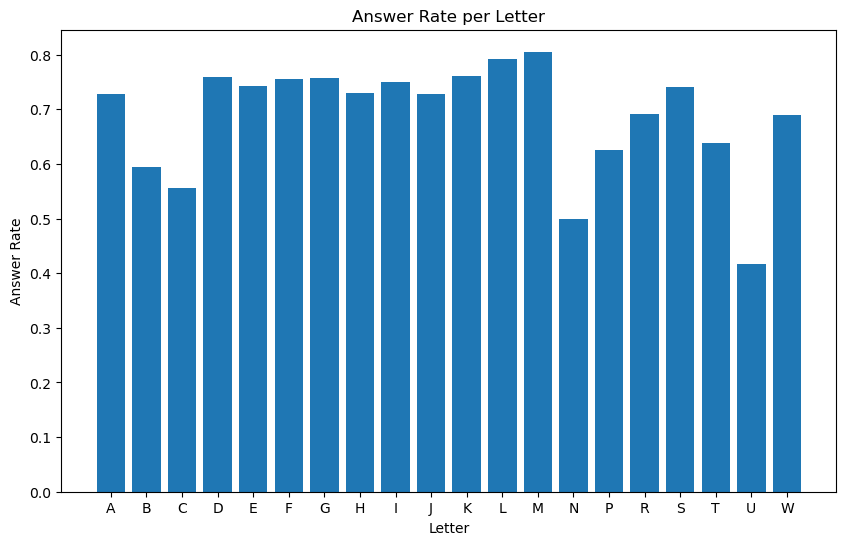

In [73]:
answer_rate_bar = answer_rate_full[[letter, answer_rate]]
bar_chart = True
pie_chart = False
title_bar = 'Answer Rate per Letter'
title_pie = ''
create_charts(answer_rate_bar, bar_chart, pie_chart, title_bar, title_pie)

In [74]:
total_frequency = 'Total Frequency'
letter_and_frequency = group(df_with_frequency, letter, frequency, np.sum, total_frequency)
letter_and_frequency

,Letter,Total Frequency
0,A,13347.0
1,B,47213.0
2,C,16457.0
3,D,416322.0
4,E,22341.0
5,F,72061.0
6,G,16622.0
7,H,66688.0
8,I,23599.0
9,J,21202.0


In [75]:
sorted_letter_and_frequency = sort(letter_and_frequency, total_frequency, ascend=False)
sorted_letter_and_frequency

,Letter,Total Frequency
0,D,416322.0
1,F,72061.0
2,H,66688.0
3,B,47213.0
4,S,46241.0
5,K,45928.0
6,P,33451.0
7,R,29512.0
8,M,24661.0
9,I,23599.0


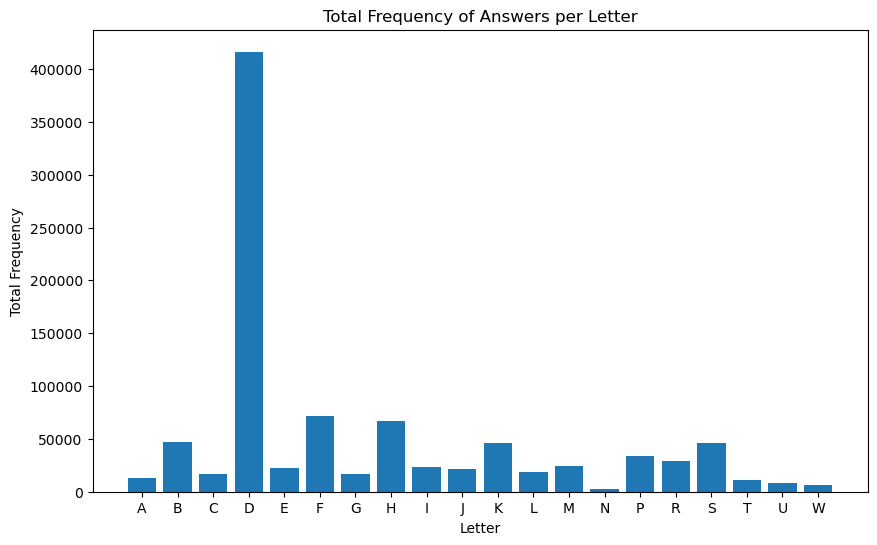

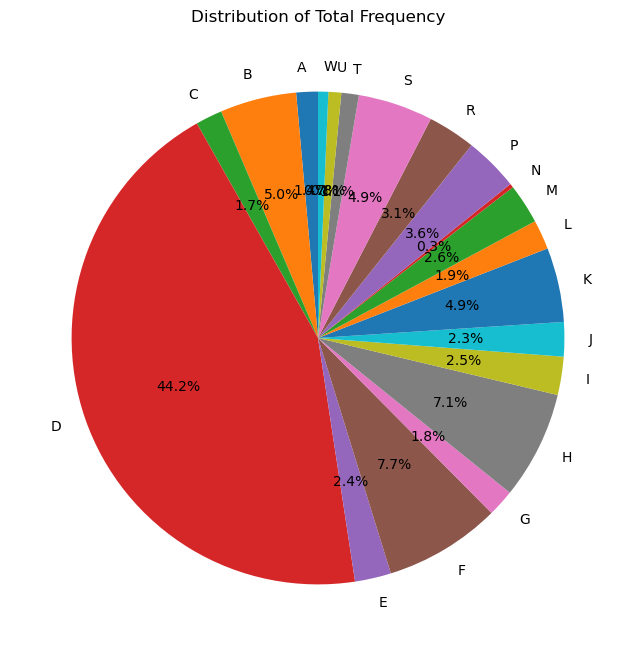

In [76]:
bar_chart = True
pie_chart = True
title_bar = 'Total Frequency of Answers per Letter'
title_pie = 'Distribution of Total Frequency'
create_charts(letter_and_frequency, bar_chart, pie_chart, title_bar, title_pie)

In [77]:
letter_total_valid_freq = pd.merge(letter_total_valid, letter_and_frequency, on=letter, how='left')
letter_total_valid_freq

,Letter,Max Number of Possible Answers,Total Valid Answer,Total Frequency
0,A,66,48,13347.0
1,B,42,25,47213.0
2,C,36,20,16457.0
3,D,108,82,416322.0
4,E,35,26,22341.0
5,F,90,68,72061.0
6,G,66,50,16622.0
7,H,96,70,66688.0
8,I,60,45,23599.0
9,J,66,48,21202.0


In [78]:
letter_freq_details = letter_total_valid_freq.copy()
avg_freq = 'Average Frequency'
letter_freq_details[avg_freq] = letter_freq_details[total_frequency] / letter_freq_details[answers_total]
letter_freq_details

,Letter,Max Number of Possible Answers,Total Valid Answer,Total Frequency,Average Frequency
0,A,66,48,13347.0,278.062500
1,B,42,25,47213.0,1888.520000
2,C,36,20,16457.0,822.850000
3,D,108,82,416322.0,5077.097561
4,E,35,26,22341.0,859.269231
5,F,90,68,72061.0,1059.720588
6,G,66,50,16622.0,332.440000
7,H,96,70,66688.0,952.685714
8,I,60,45,23599.0,524.422222
9,J,66,48,21202.0,441.708333


In [79]:
sorted_letter_freq_details = sort(letter_freq_details, avg_freq, ascend=False)
sorted_letter_freq_details

,Letter,Max Number of Possible Answers,Total Valid Answer,Total Frequency,Average Frequency
0,D,108,82,416322.0,5077.097561
1,B,42,25,47213.0,1888.520000
2,S,54,40,46241.0,1156.025000
3,F,90,68,72061.0,1059.720588
4,L,24,19,18240.0,960.000000
5,H,96,70,66688.0,952.685714
6,E,35,26,22341.0,859.269231
7,M,36,29,24661.0,850.379310
8,C,36,20,16457.0,822.850000
9,P,72,45,33451.0,743.355556


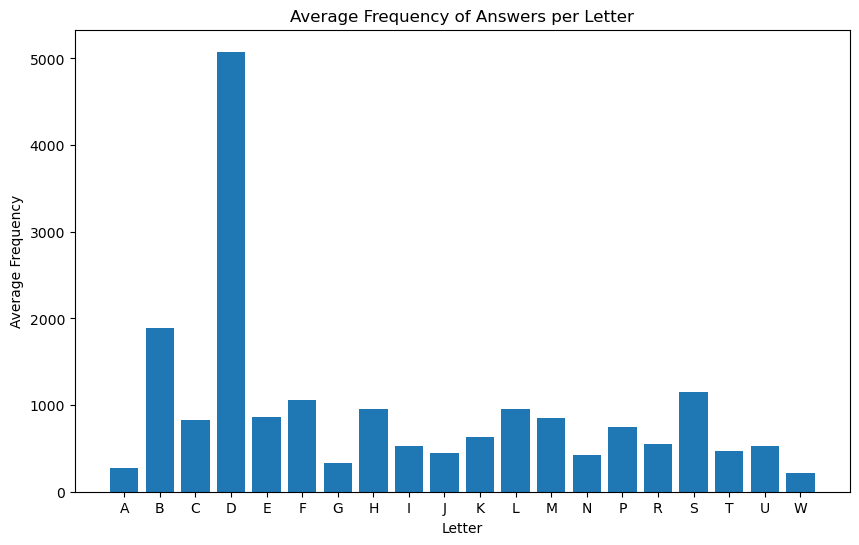

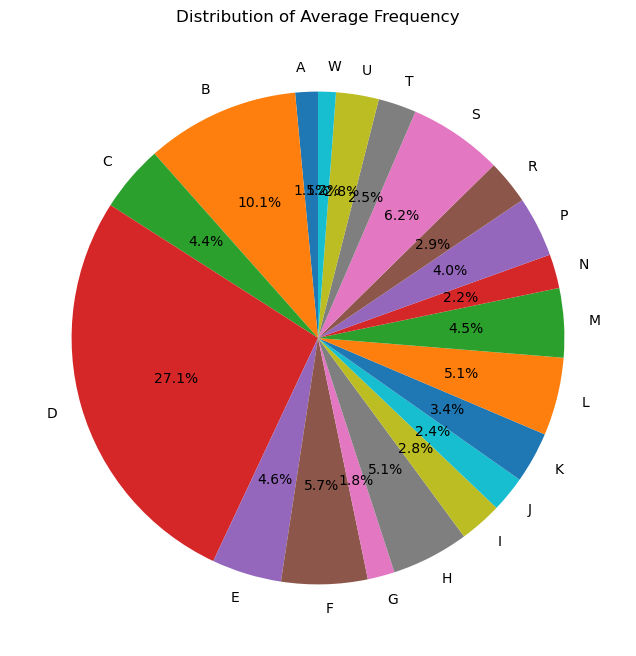

In [80]:
letter_avg_freq = letter_freq_details[[letter, avg_freq]]
bar_chart = True
pie_chart = True
title_bar = 'Average Frequency of Answers per Letter'
title_pie = 'Distribution of Average Frequency'
create_charts(letter_avg_freq, bar_chart, pie_chart, title_bar, title_pie)

## Visualizations using frequency of words: Category

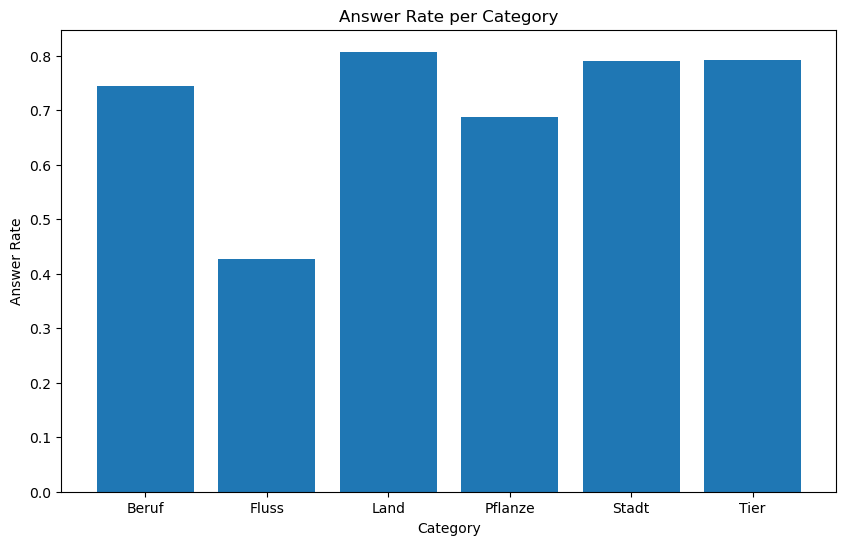

In [81]:
category_answer_rate_bar = answered_category[[category, answer_rate]]
bar_chart = True
pie_chart = False
title_bar = 'Answer Rate per Category'
title_pie = ''
create_charts(category_answer_rate_bar, bar_chart, pie_chart, title_bar, title_pie)

In [82]:
category_and_frequency = group(df_with_frequency, category, frequency, np.sum, total_frequency)
category_and_frequency

,Category,Total Frequency
0,Beruf,68848.0
1,Fluss,29427.0
2,Land,515175.0
3,Pflanze,9238.0
4,Stadt,291461.0
5,Tier,27249.0


In [83]:
sorted_category_and_frequency = sort(category_and_frequency, total_frequency, ascend=False)
sorted_category_and_frequency

,Category,Total Frequency
0,Land,515175.0
1,Stadt,291461.0
2,Beruf,68848.0
3,Fluss,29427.0
4,Tier,27249.0
5,Pflanze,9238.0


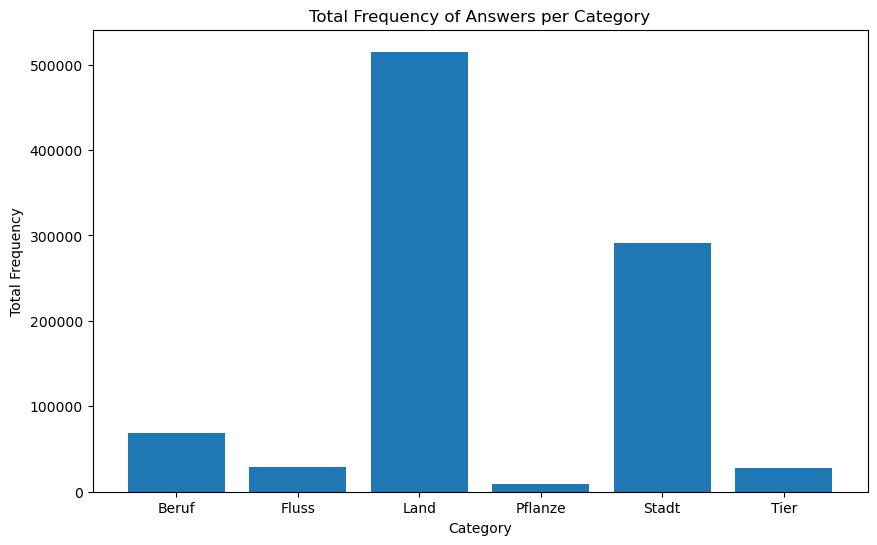

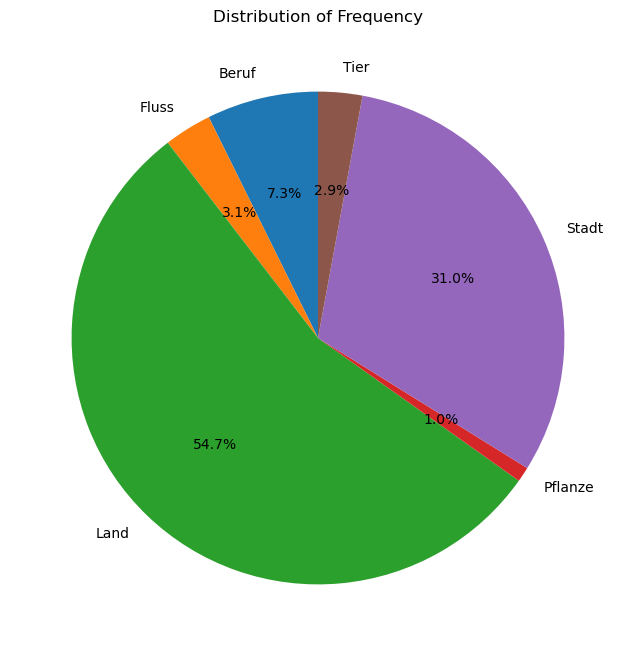

In [84]:
bar_chart = True
pie_chart = True
title_bar = 'Total Frequency of Answers per Category'
title_pie = 'Distribution of Frequency'
create_charts(category_and_frequency, bar_chart, pie_chart, title_bar, title_pie)

In [85]:
category_total_valid_freq = pd.merge(answered_category, category_and_frequency, on=category, how='left')
category_total_valid_freq

,Category,Max Number of Possible Answers,Total Valid Answer,Answer Rate,Total Frequency
0,Beruf,192,143,0.744792,68848.0
1,Fluss,192,82,0.427083,29427.0
2,Land,192,155,0.807292,515175.0
3,Pflanze,192,132,0.687500,9238.0
4,Stadt,191,151,0.790576,291461.0
5,Tier,192,152,0.791667,27249.0


In [86]:
category_freq_details = category_total_valid_freq.copy()
category_freq_details[avg_freq] = category_freq_details[total_frequency] / category_freq_details[answers_total]
category_freq_details

,Category,Max Number of Possible Answers,Total Valid Answer,Answer Rate,Total Frequency,Average Frequency
0,Beruf,192,143,0.744792,68848.0,481.454545
1,Fluss,192,82,0.427083,29427.0,358.865854
2,Land,192,155,0.807292,515175.0,3323.709677
3,Pflanze,192,132,0.687500,9238.0,69.984848
4,Stadt,191,151,0.790576,291461.0,1930.205298
5,Tier,192,152,0.791667,27249.0,179.269737


In [87]:
sorted_category_freq_details = sort(category_freq_details, avg_freq, ascend=False)
sorted_category_freq_details

,Category,Max Number of Possible Answers,Total Valid Answer,Answer Rate,Total Frequency,Average Frequency
0,Land,192,155,0.807292,515175.0,3323.709677
1,Stadt,191,151,0.790576,291461.0,1930.205298
2,Beruf,192,143,0.744792,68848.0,481.454545
3,Fluss,192,82,0.427083,29427.0,358.865854
4,Tier,192,152,0.791667,27249.0,179.269737
5,Pflanze,192,132,0.687500,9238.0,69.984848


In [88]:
cat_avg_freq = sorted_category_freq_details[[category, avg_freq]]
cat_avg_freq

,Category,Average Frequency
0,Land,3323.709677
1,Stadt,1930.205298
2,Beruf,481.454545
3,Fluss,358.865854
4,Tier,179.269737
5,Pflanze,69.984848


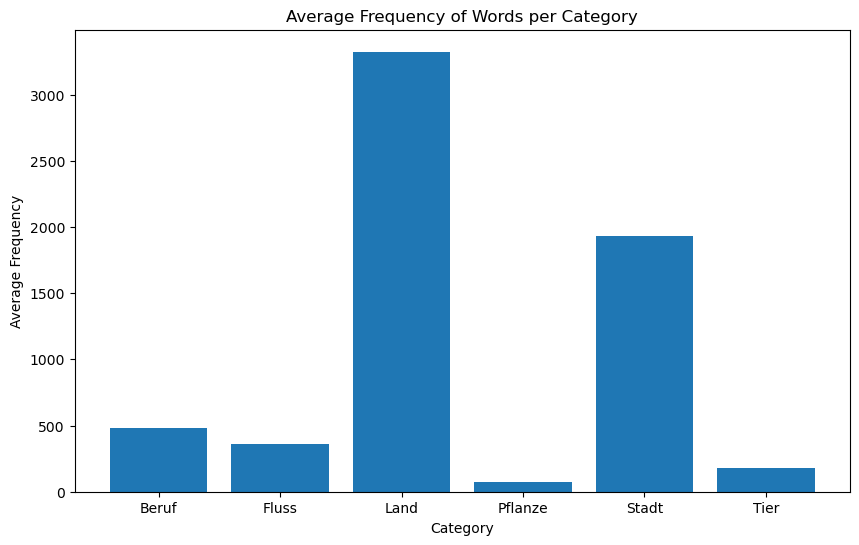

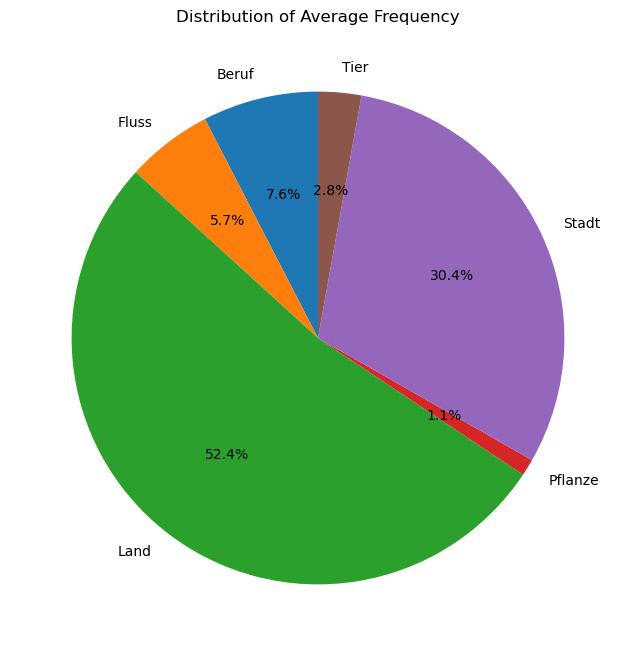

In [89]:
category_avg_freq = category_freq_details[[category, avg_freq]]
bar_chart = True
pie_chart = True
title_bar = 'Average Frequency of Words per Category'
title_pie = 'Distribution of Average Frequency'
create_charts(category_avg_freq, bar_chart, pie_chart, title_bar, title_pie)

# Visualizations for frequency of letters and category combined grouping¶

In [90]:
letter_category_frequency = group(df_with_frequency, [letter, category], frequency, np.sum, total_frequency)

letter_category_frequency[letter_category_naming] = letter_category_frequency[letter] + ': ' + letter_category_frequency[category]
letter_category_frequency = letter_category_frequency[[letter_category_naming, total_frequency]]
letter_category_frequency

,Letter: Category,Total Frequency
0,A: Beruf,1277.0
1,A: Fluss,763.0
2,A: Land,3752.0
3,A: Pflanze,284.0
4,A: Stadt,6820.0
...,...,...
115,W: Fluss,1010.0
116,W: Land,266.0
117,W: Pflanze,292.0
118,W: Stadt,2055.0


In [91]:
sorted_letter_category_frequency = sort(letter_category_frequency, total_frequency, ascend=False)
sorted_letter_category_frequency

,Letter: Category,Total Frequency
0,D: Land,357532.0
1,D: Stadt,49127.0
2,H: Stadt,49058.0
3,F: Land,43152.0
4,B: Stadt,41967.0
...,...,...
115,N: Pflanze,9.0
116,U: Fluss,0.0
117,N: Beruf,0.0
118,N: Fluss,0.0


In [92]:
least_frequency, most_frequency = min_max_finder(sorted_letter_category_frequency, total_frequency)
least_frequency

,Letter: Category,Total Frequency
116,U: Fluss,0.0
117,N: Beruf,0.0
118,N: Fluss,0.0
119,C: Fluss,0.0


In [93]:
most_frequency

,Letter: Category,Total Frequency
0,D: Land,357532.0


In [94]:
letter_category_frequency_detailed = letter_category_frequency.copy()
letter_category_frequency_detailed[answers_total] = group(
    df, [letter, category], answer, 
    lambda x: (~x.isin(["", "0", "?"]) & x.notnull()).sum(),  # Exclude invalid values and nulls
    answers_total
)[answers_total]

letter_category_frequency_detailed[max_pos] = group(df, [letter, category], answer, len, max_pos)[max_pos]

letter_category_frequency_detailed = letter_category_frequency_detailed[[letter_category_naming, total_frequency, answers_total, max_pos]]
letter_category_frequency_detailed

,Letter: Category,Total Frequency,Total Valid Answer,Max Number of Possible Answers
0,A: Beruf,1277.0,6,11
1,A: Fluss,763.0,7,11
2,A: Land,3752.0,9,11
3,A: Pflanze,284.0,9,11
4,A: Stadt,6820.0,9,11
...,...,...,...,...
115,W: Fluss,1010.0,6,7
116,W: Land,266.0,2,7
117,W: Pflanze,292.0,5,7
118,W: Stadt,2055.0,6,7


In [95]:
letter_category_frequency_detailed[answer_rate] = letter_category_frequency_detailed[answers_total] / letter_category_frequency_detailed[max_pos]
letter_category_frequency_detailed

,Letter: Category,Total Frequency,Total Valid Answer,Max Number of Possible Answers,Answer Rate
0,A: Beruf,1277.0,6,11,0.545455
1,A: Fluss,763.0,7,11,0.636364
2,A: Land,3752.0,9,11,0.818182
3,A: Pflanze,284.0,9,11,0.818182
4,A: Stadt,6820.0,9,11,0.818182
...,...,...,...,...,...
115,W: Fluss,1010.0,6,7,0.857143
116,W: Land,266.0,2,7,0.285714
117,W: Pflanze,292.0,5,7,0.714286
118,W: Stadt,2055.0,6,7,0.857143


In [96]:
least_answer_rate, most_answer_rate = min_max_finder(letter_category_frequency_detailed, answer_rate)
least_answer_rate

,Letter: Category,Total Frequency,Total Valid Answer,Max Number of Possible Answers,Answer Rate
13,C: Fluss,0.0,0,6,0.0
78,N: Beruf,0.0,0,2,0.0
79,N: Fluss,0.0,0,2,0.0
109,U: Fluss,0.0,0,6,0.0


In [97]:
most_answer_rate

,Letter: Category,Total Frequency,Total Valid Answer,Max Number of Possible Answers,Answer Rate
16,C: Stadt,4620.0,6,6,1.0
36,G: Beruf,2675.0,11,11,1.0
41,G: Tier,628.0,11,11,1.0
53,I: Tier,2172.0,10,10,1.0
54,J: Beruf,6173.0,11,11,1.0
66,L: Beruf,14016.0,4,4,1.0
68,L: Land,1718.0,4,4,1.0
70,L: Stadt,1737.0,4,4,1.0
74,M: Land,1229.0,6,6,1.0
76,M: Stadt,15379.0,6,6,1.0


In [98]:
letter_category_frequency_detailed[avg_freq] = letter_category_frequency_detailed[total_frequency] / letter_category_frequency_detailed[max_pos]
letter_category_frequency_detailed

,Letter: Category,Total Frequency,Total Valid Answer,Max Number of Possible Answers,Answer Rate,Average Frequency
0,A: Beruf,1277.0,6,11,0.545455,116.090909
1,A: Fluss,763.0,7,11,0.636364,69.363636
2,A: Land,3752.0,9,11,0.818182,341.090909
3,A: Pflanze,284.0,9,11,0.818182,25.818182
4,A: Stadt,6820.0,9,11,0.818182,620.000000
...,...,...,...,...,...,...
115,W: Fluss,1010.0,6,7,0.857143,144.285714
116,W: Land,266.0,2,7,0.285714,38.000000
117,W: Pflanze,292.0,5,7,0.714286,41.714286
118,W: Stadt,2055.0,6,7,0.857143,293.571429


In [99]:
sorted_letter_category_frequency_detailed = sort(letter_category_frequency_detailed, avg_freq, ascend=False)
sorted_letter_category_frequency_detailed

,Letter: Category,Total Frequency,Total Valid Answer,Max Number of Possible Answers,Answer Rate,Average Frequency
0,D: Land,357532.0,16,18,0.888889,19862.888889
1,B: Stadt,41967.0,3,7,0.428571,5995.285714
2,E: Stadt,18764.0,4,5,0.800000,3752.800000
3,L: Beruf,14016.0,4,4,1.000000,3504.000000
4,S: Stadt,30380.0,8,9,0.888889,3375.555556
...,...,...,...,...,...,...
115,C: Pflanze,11.0,2,6,0.333333,1.833333
116,C: Fluss,0.0,0,6,0.000000,0.000000
117,N: Beruf,0.0,0,2,0.000000,0.000000
118,N: Fluss,0.0,0,2,0.000000,0.000000


In [100]:
least_avg_freq, most_avg_freq = min_max_finder(sorted_letter_category_frequency_detailed, avg_freq)
least_avg_freq

,Letter: Category,Total Frequency,Total Valid Answer,Max Number of Possible Answers,Answer Rate,Average Frequency
116,C: Fluss,0.0,0,6,0.0,0.0
117,N: Beruf,0.0,0,2,0.0,0.0
118,N: Fluss,0.0,0,2,0.0,0.0
119,U: Fluss,0.0,0,6,0.0,0.0


In [101]:
most_avg_freq

,Letter: Category,Total Frequency,Total Valid Answer,Max Number of Possible Answers,Answer Rate,Average Frequency
0,D: Land,357532.0,16,18,0.888889,19862.888889


In [102]:
pointss

,Letter,Max Number of Possible Answers,Total Points,Points Rate
0,A,66,74,1.121212
1,B,42,50,1.190476
2,C,36,33,0.916667
3,D,108,122,1.129630
4,E,35,43,1.228571
5,F,90,99,1.100000
6,G,66,70,1.060606
7,H,96,110,1.145833
8,I,60,59,0.983333
9,J,66,65,0.984848


# Key Findings Tables

In [103]:
prep = uniqueness[[letter, total_unique, mean_unique]]
letter_freq_details_prep = letter_freq_details.drop(columns=[total_frequency])
letter_table = pd.merge(prep, letter_freq_details_prep, on=letter, how='inner')
points_prep = pointss[[letter, points_rate]]
letter_table = pd.merge(letter_table, points_prep, on=letter, how='inner')
answered_prep = answered[[letter, answer_rate]]
letter_table = pd.merge(letter_table, answered_prep, on=letter, how='inner')
letter_table = letter_table[[letter, total_unique, answers_total, max_pos, answer_rate, mean_unique, points_rate, avg_freq]]
letter_table

,Letter,Total Unique Answers,Total Valid Answer,Max Number of Possible Answers,Answer Rate,Unique Rate,Points Rate,Average Frequency
0,A,26,48,66,0.727273,0.393939,1.121212,278.062500
1,B,25,25,42,0.595238,0.595238,1.190476,1888.520000
2,C,13,20,36,0.555556,0.361111,0.916667,822.850000
3,D,40,82,108,0.759259,0.370370,1.129630,5077.097561
4,E,17,26,35,0.742857,0.485714,1.228571,859.269231
5,F,31,68,90,0.755556,0.344444,1.100000,1059.720588
6,G,20,50,66,0.757576,0.303030,1.060606,332.440000
7,H,40,70,96,0.729167,0.416667,1.145833,952.685714
8,I,14,45,60,0.750000,0.233333,0.983333,524.422222
9,J,17,48,66,0.727273,0.257576,0.984848,441.708333


In [104]:
prep = category_total_valid_freq[[category, answers_total, answer_rate]]
cat_table = pd.merge(cat_uniqueness, prep, on=category, how='inner')
prep_points = cat_pointss[[category, points_rate]]
cat_table = pd.merge(cat_table, prep_points, on=category, how='inner')
prep_category_freq_details = category_freq_details[[category, avg_freq]]
cat_table = pd.merge(cat_table, prep_category_freq_details, on=category, how='inner')
cat_table

,Category,Max Number of Possible Answers,Total Unique Answers,Unique Rate,Total Valid Answer,Answer Rate,Points Rate,Average Frequency
0,Beruf,192,104,0.541667,143,0.744792,1.286458,481.454545
1,Fluss,192,39,0.203125,82,0.427083,0.630208,358.865854
2,Land,192,71,0.369792,155,0.807292,1.177083,3323.709677
3,Pflanze,192,90,0.468750,132,0.687500,1.156250,69.984848
4,Stadt,191,83,0.434555,151,0.790576,1.225131,1930.205298
5,Tier,192,86,0.447917,152,0.791667,1.239583,179.269737


In [105]:
points_column = letter_category_points_detailed[[points_rate]]
letter_category_unique_detailed[points_rate] = points_column

freq_column = letter_category_frequency_detailed[[avg_freq]]
letter_category_unique_detailed[avg_freq] = freq_column

letter_category_unique_detailed

,Letter: Category,Total Unique Answers,Total Valid Answer,Max Number of Possible Answers,Unique Rate,Points Rate,Average Frequency
0,A: Beruf,6,6,11,0.545455,1.090909,116.090909
1,A: Fluss,3,7,11,0.272727,0.909091,69.363636
2,A: Land,3,9,11,0.272727,1.090909,341.090909
3,A: Pflanze,5,9,11,0.454545,1.272727,25.818182
4,A: Stadt,7,9,11,0.636364,1.454545,620.000000
...,...,...,...,...,...,...,...
115,W: Fluss,3,6,7,0.428571,1.285714,144.285714
116,W: Land,0,2,7,0.000000,0.285714,38.000000
117,W: Pflanze,5,5,7,0.714286,1.428571,41.714286
118,W: Stadt,6,6,7,0.857143,1.714286,293.571429


# Player Analysis 

In [106]:
total_points_by_player = group(df, player_id, points, operation=np.sum, new_column=points)
total_points_by_player

,Player ID,Points
0,1-A,62
1,1-B,71
2,1-C,73
3,1-D,72
4,1-E,65
5,1-F,68
6,1-G,65
7,2-A,35
8,2-B,60
9,2-C,61


In [107]:
sorted_total_points_by_player = sort(total_points_by_player, points, ascend=False)
sorted_total_points_by_player

,Player ID,Points
0,4-B,126
1,4-A,113
2,3-B,94
3,4-C,88
4,3-A,83
5,1-C,73
6,1-D,72
7,1-B,71
8,1-F,68
9,5-B,66


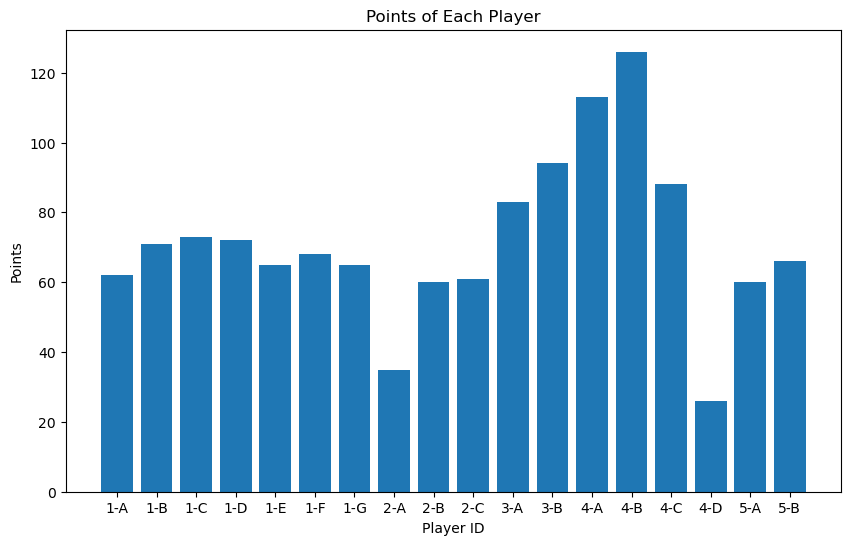

In [108]:
bar_chart = True
pie_chart = False
title_bar = 'Points of Each Player'
title_pie = ''
create_charts(total_points_by_player, bar_chart, pie_chart, title_bar, title_pie)

In [109]:
total_frequency_by_player = group(df_with_frequency, player_id, frequency, operation=np.sum, new_column=frequency)
total_frequency_by_player

,Player ID,Frequency
0,1-A,70275.0
1,1-B,24223.0
2,1-C,21050.0
3,1-D,30519.0
4,1-E,30292.0
5,1-F,13710.0
6,1-G,31625.0
7,2-A,21916.0
8,2-B,31148.0
9,2-C,45996.0


In [110]:
sorted_total_frequency_by_player = sort(total_frequency_by_player, frequency, ascend=False)
sorted_total_frequency_by_player

,Player ID,Frequency
0,4-B,110218.0
1,4-A,94050.0
2,3-A,84471.0
3,3-B,84429.0
4,4-C,76682.0
5,5-A,76098.0
6,1-A,70275.0
7,5-B,69843.0
8,2-C,45996.0
9,1-G,31625.0


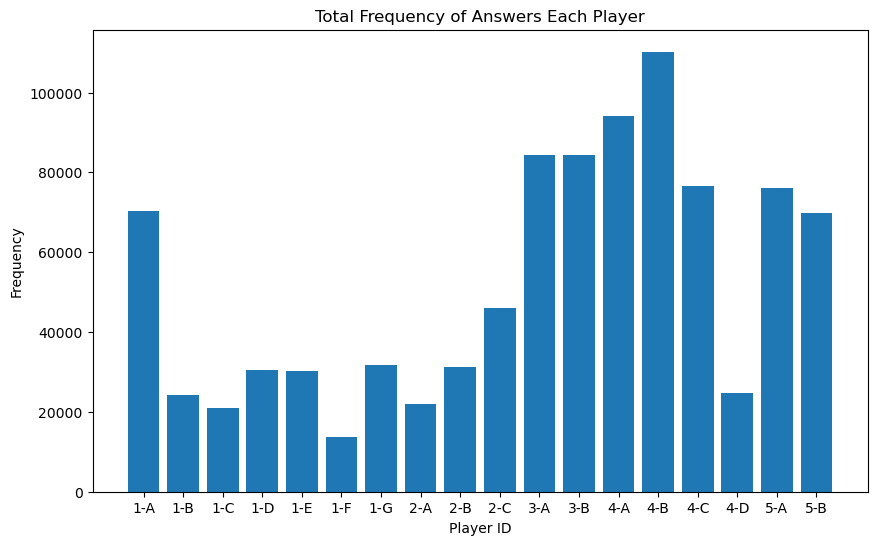

In [111]:
bar_chart = True
pie_chart = False
title_bar = 'Total Frequency of Answers Each Player'
title_pie = ''
create_charts(total_frequency_by_player, bar_chart, pie_chart, title_bar, title_pie)

In [112]:
answered_df = df_with_frequency[df_with_frequency['Points'] > 0]
average_frequency_by_player = group(answered_df, player_id, frequency, operation=np.mean, new_column=frequency)
average_frequency_by_player

,Player ID,Frequency
0,1-A,1634.302326
1,1-B,474.960784
2,1-C,426.312500
3,1-D,575.830189
4,1-E,673.155556
5,1-F,326.428571
6,1-G,702.777778
7,2-A,952.869565
8,2-B,865.222222
9,2-C,1314.171429


In [113]:
sorted_average_frequency_by_player = sort(average_frequency_by_player, frequency, ascend=False)
sorted_average_frequency_by_player

,Player ID,Frequency
0,5-A,2113.833333
1,3-A,1836.326087
2,5-B,1790.846154
3,1-A,1634.302326
4,3-B,1623.634615
5,4-D,1461.941176
6,4-B,1431.402597
7,4-A,1363.043478
8,4-C,1322.103448
9,2-C,1314.171429


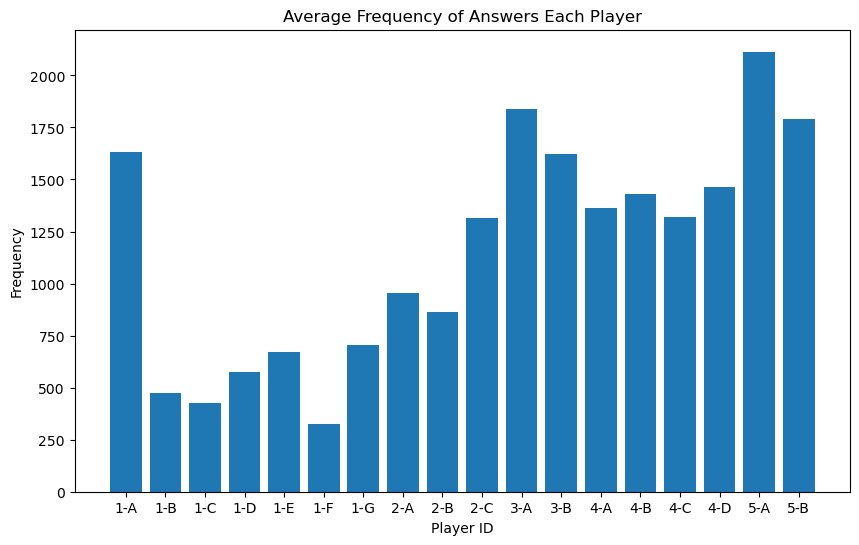

In [114]:
bar_chart = True
pie_chart = False
title_bar = 'Average Frequency of Answers Each Player'
title_pie = ''
create_charts(average_frequency_by_player, bar_chart, pie_chart, title_bar, title_pie)

# Answers/Words Analysis

In [115]:
filtered_df_with_frequency = df_with_frequency[df_with_frequency[points] > 0]
answers_and_frequencies = filtered_df_with_frequency[[answer, frequency]]
filtered_answers_and_frequencies = answers_and_frequencies.drop_duplicates(subset=[answer, frequency])

sorted_filtered_answers_and_frequencies = sort(filtered_answers_and_frequencies, frequency, ascend=False)
sorted_filtered_answers_and_frequencies

,Answer,Frequency
0,Deutschland,43530.0
1,Berlin,19068.0
2,München,11218.0
3,Hamburg,7351.0
4,Köln,6826.0
...,...,...
442,Ahnenforscher,2.0
443,Hortner,1.0
444,Radolfzell am Bodensee,1.0
445,Rangierbegleiter,1.0


In [116]:
least_freq, most_freq = min_max_finder(sorted_filtered_answers_and_frequencies, frequency)

print("Least Frequent Answers")
print(least_freq)
print()
print("Most Frequent Answers")
print(most_freq)

Least Frequent Answers
                     Answer  Frequency
443                 Hortner        1.0
444  Radolfzell am Bodensee        1.0
445        Rangierbegleiter        1.0
446                 Astilbe        1.0

Most Frequent Answers
        Answer  Frequency
0  Deutschland    43530.0


In [117]:
def print_tables_by_field(data, field):
    grouped = data.groupby(field)
    tables = {}
    
    for i, group in grouped:
        sorted_group = sort(group, "Frequency", ascend=False)
        tables[i] = sorted_group
    
    return tables

def only_below_avg_freq(data):
    avg_freq = data[frequency].mean()
    below_avg_df = data[data[frequency] < avg_freq]
    return below_avg_df, avg_freq

In [118]:
answers_and_frequencies = filtered_df_with_frequency[[letter, answer, frequency]]
filtered_answers_and_frequencies = answers_and_frequencies.drop_duplicates(subset=[letter, answer, frequency])

print("Answers & Their Frequencies For Each Letter")
table_with_freqs_letter = print_tables_by_field(filtered_answers_and_frequencies, letter)
table_with_freqs_letter

Answers & Their Frequencies For Each Letter


{'A':    Letter         Answer  Frequency
 0       A       Augsburg     1553.0
 1       A         Aachen     1381.0
 2       A    Argentinien      657.0
 3       A      Apotheker      545.0
 4       A          Aalen      423.0
 5       A       Albanien      339.0
 6       A  Aserbaidschan      257.0
 7       A       Armenien      212.0
 8       A         Amberg      194.0
 9       A      Altenburg      171.0
 10      A          Aller      149.0
 11      A         Angola      104.0
 12      A         Angler      100.0
 13      A       Arnstadt       82.0
 14      A         Alster       80.0
 15      A           Affe       76.0
 16      A            Ahr       57.0
 17      A           Anis       51.0
 18      A    Autohändler       45.0
 19      A      Apfelbaum       43.0
 20      A          Amsel       42.0
 21      A    Anästhesist       40.0
 22      A         Ameise       35.0
 23      A          Ammer       30.0
 24      A       Aprikose       13.0
 25      A  Affenbrotbaum        

In [119]:
print("Filtered For Only The Answers That Has Lower Frequency Than Average Frequecny For That Letter\n")
empty_df = pd.DataFrame()
empty_df_dictionary = pd.DataFrame()
for each_letter in sorted(df[letter].unique()):
    df_to_add, avg_freq = only_below_avg_freq(table_with_freqs_letter[each_letter])
    print(df_to_add)
    print()
    empty_df = pd.concat([empty_df, df_to_add], ignore_index=True)
    
    stadt_land_fluss_data_letter = stadt_land_fluss_data[(stadt_land_fluss_data["FirstLetter"] == each_letter) & (stadt_land_fluss_data["Freq"] < avg_freq)] 
    empty_df_dictionary = pd.concat([empty_df_dictionary, stadt_land_fluss_data_letter], ignore_index=True)

empty_df.to_csv("letter.csv", index=False)
empty_df_dictionary.to_csv("letter_dictionary.csv", index=False)

Filtered For Only The Answers That Has Lower Frequency Than Average Frequecny For That Letter

   Letter         Answer  Frequency
7       A       Armenien      212.0
8       A         Amberg      194.0
9       A      Altenburg      171.0
10      A          Aller      149.0
11      A         Angola      104.0
12      A         Angler      100.0
13      A       Arnstadt       82.0
14      A         Alster       80.0
15      A           Affe       76.0
16      A            Ahr       57.0
17      A           Anis       51.0
18      A    Autohändler       45.0
19      A      Apfelbaum       43.0
20      A          Amsel       42.0
21      A    Anästhesist       40.0
22      A         Ameise       35.0
23      A          Ammer       30.0
24      A       Aprikose       13.0
25      A  Affenbrotbaum        4.0
26      A  Ahnenforscher        2.0
27      A        Astilbe        1.0

   Letter        Answer  Frequency
2       B       Belgien     1179.0
3       B      Bodensee      605.0
4      

In [120]:
answers_and_frequencies = filtered_df_with_frequency[[category, answer, frequency]]
filtered_answers_and_frequencies = answers_and_frequencies.drop_duplicates(subset=[category, answer, frequency])
print("Answers & Their Frequencies For Each Category")
table_with_freqs_category = print_tables_by_field(filtered_answers_and_frequencies, category)
table_with_freqs_category

Answers & Their Frequencies For Each Category


{'Beruf':    Category            Answer  Frequency
 0     Beruf            Lehrer     4667.0
 1     Beruf          Künstler     4367.0
 2     Beruf           Richter     2473.0
 3     Beruf           Händler     1724.0
 4     Beruf           Fischer     1721.0
 ..      ...               ...        ...
 88    Beruf      Eisverkäufer        4.0
 89    Beruf     Kindergärtner        2.0
 90    Beruf     Ahnenforscher        2.0
 91    Beruf           Hortner        1.0
 92    Beruf  Rangierbegleiter        1.0
 
 [93 rows x 3 columns],
 'Fluss':    Category     Answer  Frequency
 0     Fluss       Main     2121.0
 1     Fluss      Rhein     1254.0
 2     Fluss       Elbe      704.0
 3     Fluss      Donau      693.0
 4     Fluss   Bodensee      605.0
 5     Fluss      Fulda      417.0
 6     Fluss       Gera      384.0
 7     Fluss     Jordan      344.0
 8     Fluss      Weser      289.0
 9     Fluss      Saale      283.0
 10    Fluss        Ems      239.0
 11    Fluss       Saar      225

In [121]:
print("Filtered For Only The Categories That Has Lower Frequency Than Average Frequency For That Category\n")
empty_df = pd.DataFrame()
empty_df_dictionary = pd.DataFrame()
for each_category in sorted(df[category].unique()):
    df_to_add, avg_freq = only_below_avg_freq(table_with_freqs_category[each_category])
    print(df_to_add)
    print()
    empty_df = pd.concat([empty_df, df_to_add], ignore_index=True)

    stadt_land_fluss_data_cat = stadt_land_fluss_data[(stadt_land_fluss_data[category] == each_category) & (stadt_land_fluss_data["Freq"] < avg_freq)] 
    empty_df_dictionary = pd.concat([empty_df_dictionary, stadt_land_fluss_data_cat], ignore_index=True)

empty_df.to_csv("category.csv", index=False)
empty_df_dictionary.to_csv("category_dictionary.csv", index=False)

Filtered For Only The Categories That Has Lower Frequency Than Average Frequency For That Category

   Category            Answer  Frequency
18    Beruf           Gärtner      332.0
19    Beruf            Doktor      309.0
20    Beruf            Maurer      296.0
21    Beruf           Förster      276.0
22    Beruf            Winzer      272.0
..      ...               ...        ...
88    Beruf      Eisverkäufer        4.0
89    Beruf     Kindergärtner        2.0
90    Beruf     Ahnenforscher        2.0
91    Beruf           Hortner        1.0
92    Beruf  Rangierbegleiter        1.0

[75 rows x 3 columns]

   Category     Answer  Frequency
10    Fluss        Ems      239.0
11    Fluss       Saar      225.0
12    Fluss        Inn      218.0
13    Fluss     Moldau      209.0
14    Fluss       Isar      207.0
15    Fluss      Spree      202.0
16    Fluss      Havel      201.0
17    Fluss      Aller      149.0
18    Fluss      Helme      139.0
19    Fluss     Kocher      106.0
20    Flus

In [122]:
df_with_frequency_with_pair = df_with_frequency.copy()
df_with_frequency_with_pair[letter+":"+category] = df_with_frequency_with_pair[letter] + ": " + df_with_frequency_with_pair[category]
grouped_sum_df_with_frequency = group(df_with_frequency_with_pair, [letter+":"+category], frequency, np.sum, total_frequency)
sorted_grouped_sum_df_with_frequency = sort(grouped_sum_df_with_frequency, total_frequency, ascend=False)
sorted_grouped_sum_df_with_frequency

,Letter:Category,Total Frequency
0,D: Land,357532.0
1,D: Stadt,49127.0
2,H: Stadt,49058.0
3,F: Land,43152.0
4,B: Stadt,41967.0
...,...,...
115,N: Pflanze,9.0
116,U: Fluss,0.0
117,N: Beruf,0.0
118,N: Fluss,0.0


In [123]:
grouped_sum_df_with_frequency = group(df_with_frequency_with_pair, [letter+":"+category], frequency, np.mean, "Average Frequency")
sorted_grouped_sum_df_with_frequency = sort(grouped_sum_df_with_frequency, "Average Frequency", ascend=False)
sorted_grouped_sum_df_with_frequency

,Letter:Category,Average Frequency
0,D: Land,19862.888889
1,B: Stadt,5995.285714
2,E: Stadt,3752.800000
3,L: Beruf,3504.000000
4,S: Stadt,3375.555556
...,...,...
115,C: Pflanze,1.833333
116,C: Fluss,0.000000
117,N: Beruf,0.000000
118,N: Fluss,0.000000


In [124]:
filtered_df_with_frequency_copy = filtered_df_with_frequency.copy()

filtered_df_with_frequency_copy['Letter:Category'] = (
    filtered_df_with_frequency_copy['Letter'] + ": " + filtered_df_with_frequency_copy['Category'])

filtered_df_with_frequency_copy = filtered_df_with_frequency_copy[['Letter:Category', 'Answer', 'Frequency']]
filtered_df_with_frequency_sorted = sort(filtered_df_with_frequency_copy, 'Letter:Category', ascend=True)
print("Answers & Their Frequencies For Each Letter:Category Tuple")
table_with_freqs_tuple = print_tables_by_field(filtered_df_with_frequency_sorted, 'Letter:Category')
table_with_freqs_tuple

Answers & Their Frequencies For Each Letter:Category Tuple


{'A: Beruf':   Letter:Category         Answer  Frequency
 0        A: Beruf      Apotheker      545.0
 1        A: Beruf      Apotheker      545.0
 2        A: Beruf         Angler      100.0
 3        A: Beruf    Autohändler       45.0
 4        A: Beruf    Anästhesist       40.0
 5        A: Beruf  Ahnenforscher        2.0,
 'A: Fluss':   Letter:Category  Answer  Frequency
 0        A: Fluss   Aller      149.0
 1        A: Fluss   Aller      149.0
 2        A: Fluss   Aller      149.0
 3        A: Fluss   Aller      149.0
 4        A: Fluss  Alster       80.0
 5        A: Fluss     Ahr       57.0
 6        A: Fluss   Ammer       30.0,
 'A: Land':   Letter:Category         Answer  Frequency
 0         A: Land    Argentinien      657.0
 1         A: Land    Argentinien      657.0
 2         A: Land    Argentinien      657.0
 3         A: Land    Argentinien      657.0
 4         A: Land       Albanien      339.0
 5         A: Land  Aserbaidschan      257.0
 6         A: Land       Arme

In [125]:
print("Filtered For Only The Letter:Category Tuples That Has Lower Frequency Than Average Frequency For That Letter:Category Tuple\n")
empty_df = pd.DataFrame()
empty_df_dictionary = pd.DataFrame()
for key, df in table_with_freqs_tuple.items():
    df_to_add, avg_freq = only_below_avg_freq(df)
    print(df_to_add)
    print()
    empty_df = pd.concat([empty_df, df_to_add], ignore_index=True)

    stadt_land_fluss_data_tuple = stadt_land_fluss_data[(stadt_land_fluss_data["FirstLetter"] == each_letter) & (stadt_land_fluss_data[category] == each_category) & (stadt_land_fluss_data["Freq"] < avg_freq)] 
    empty_df_dictionary = pd.concat([empty_df_dictionary, stadt_land_fluss_data_tuple], ignore_index=True)
    
empty_df.to_csv("letter_category.csv", index=False)
empty_df_dictionary.to_csv("letter_category_dictionary.csv", index=False)

Filtered For Only The Letter:Category Tuples That Has Lower Frequency Than Average Frequency For That Letter:Category Tuple

  Letter:Category         Answer  Frequency
2        A: Beruf         Angler      100.0
3        A: Beruf    Autohändler       45.0
4        A: Beruf    Anästhesist       40.0
5        A: Beruf  Ahnenforscher        2.0

  Letter:Category  Answer  Frequency
4        A: Fluss  Alster       80.0
5        A: Fluss     Ahr       57.0
6        A: Fluss   Ammer       30.0

  Letter:Category         Answer  Frequency
4         A: Land       Albanien      339.0
5         A: Land  Aserbaidschan      257.0
6         A: Land       Armenien      212.0
7         A: Land       Armenien      212.0
8         A: Land         Angola      104.0

  Letter:Category         Answer  Frequency
6      A: Pflanze       Aprikose       13.0
7      A: Pflanze  Affenbrotbaum        4.0
8      A: Pflanze        Astilbe        1.0

  Letter:Category     Answer  Frequency
4        A: Stadt      